# Lab Assignment - 2

Write a script to implement following for the given Dataset Bengluru housing Dataset.

Exercise 1: Draw a scatter plot for the data mentioned for given attributes.

Exercise 2: Perform Data Preprocessing

Exercise 3: Performs gradient descent to learn "theta".(Using the library and without using the library).Compare the values of "theta" in both cases. )

Exercise 4: Splitting the dataset into the training dataset and testing dataset, 60:40, 70:30, 80:20

Exercise 5: Train linear regression model and test the USING Gradient Descent and using the library. Find out the limitation in the both cases.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df1=pd.read_csv("bengaluru_house_prices.csv")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df=df1[["total_sqft","price"]]
df

,total_sqft,price
0,1056,39.07
1,2600,120.00
2,1440,62.00
3,1521,95.00
4,1200,51.00
...,...,...
13315,3453,231.00
13316,3600,400.00
13317,1141,60.00
13318,4689,488.00


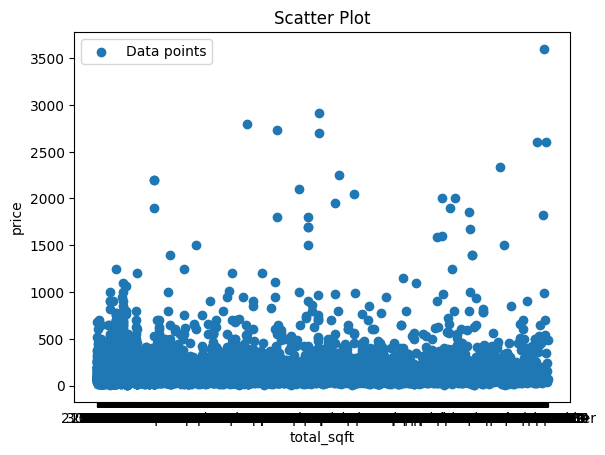

In [4]:
# Scatter plot
plt.scatter(df.total_sqft,df.price,label='Data points')
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.title('Scatter Plot')
plt.legend()
plt.show()

Perform Data pre-processing

In [6]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [7]:
df2=df.copy()
df2.total_sqft=df2.total_sqft.apply(convert_sqft_to_num)
df2=df2[df2.total_sqft.notnull()]
df2

,total_sqft,price
0,1056.0,39.07
1,2600.0,120.00
2,1440.0,62.00
3,1521.0,95.00
4,1200.0,51.00
...,...,...
13315,3453.0,231.00
13316,3600.0,400.00
13317,1141.0,60.00
13318,4689.0,488.00


In [8]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Separate features and target
X = df2[['total_sqft']]
Y = df2['price']

# Normalization
normalizer = MinMaxScaler()

X_scaled_normalized = normalizer.fit_transform(X)

print("\nNormalized Data:")

print(X_scaled_normalized)


Normalized Data:
[[0.02018328]
 [0.04972164]
 [0.02752961]
 ...
 [0.02180942]
 [0.08968644]
 [0.01050296]]


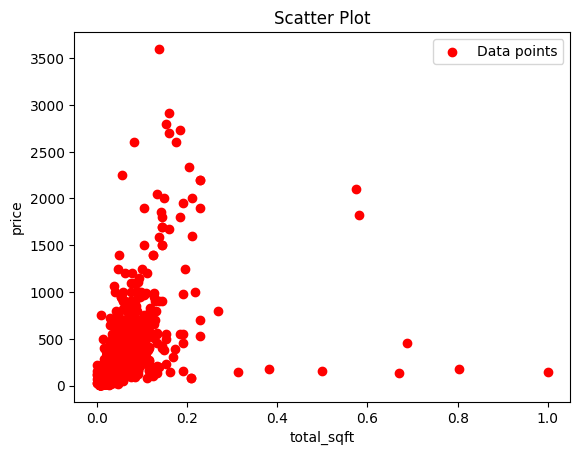

In [9]:
# Scatter plot
plt.scatter(X_scaled_normalized,Y,label='Data points',color="red")

plt.xlabel('total_sqft')

plt.ylabel('price')

plt.title('Scatter Plot')

plt.legend()

# plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

Performs gradient descent to learn theta. (using the library and without using the library). Compare the values of ‘theta’ in both cases.

In [11]:
def gredient_descent(X,Y):

    theta_1 = 0
    theta_0 = 0
    
    l = 0.001

    #learning rate
    epochs = 10000

    #number of iterations
    n=float(len(X))

    # printing gradient descent

    for i in range(epochs):
        Y_pred = theta_1 * X + theta_0 
        
        # Calculate the Mean Squared Error (MSE)
        
        mse=(1/n)*sum((Y-Y_pred)**2)

        D_theta_1 = (-2/n)*sum(X*(Y-Y_pred))
        D_theta_0 = (-2/n)*sum(Y-Y_pred)
        theta_1 = theta_1-l*D_theta_1
        theta_0 = theta_0-l*D_theta_0
        
        print("Epoch {}: theta_1 = {:.4f}, theta_0 = {:.4f}, MSE = {:.4f}".format(i+1,theta_1,theta_0,mse))

In [12]:
X_scaled_normalized_1d = X_scaled_normalized.reshape(-1)

In [13]:
gredient_descent(X_scaled_normalized_1d,Y)

Epoch 1: theta_1 = 0.0108, theta_0 = 0.2249, MSE = 34866.1247
Epoch 2: theta_1 = 0.0215, theta_0 = 0.4494, MSE = 34815.4761
Epoch 3: theta_1 = 0.0323, theta_0 = 0.6734, MSE = 34765.0300
Epoch 4: theta_1 = 0.0430, theta_0 = 0.8969, MSE = 34714.7856
Epoch 5: theta_1 = 0.0537, theta_0 = 1.1200, MSE = 34664.7421
Epoch 6: theta_1 = 0.0644, theta_0 = 1.3427, MSE = 34614.8987
Epoch 7: theta_1 = 0.0751, theta_0 = 1.5649, MSE = 34565.2546
Epoch 8: theta_1 = 0.0858, theta_0 = 1.7867, MSE = 34515.8089
Epoch 9: theta_1 = 0.0965, theta_0 = 2.0080, MSE = 34466.5610
Epoch 10: theta_1 = 0.1071, theta_0 = 2.2289, MSE = 34417.5099
Epoch 11: theta_1 = 0.1178, theta_0 = 2.4494, MSE = 34368.6550
Epoch 12: theta_1 = 0.1284, theta_0 = 2.6694, MSE = 34319.9954
Epoch 13: theta_1 = 0.1390, theta_0 = 2.8889, MSE = 34271.5304
Epoch 14: theta_1 = 0.1496, theta_0 = 3.1080, MSE = 34223.2591
Epoch 15: theta_1 = 0.1602, theta_0 = 3.3267, MSE = 34175.1808
Epoch 16: theta_1 = 0.1707, theta_0 = 3.5450, MSE = 34127.2948
E

Epoch 160: theta_1 = 1.5691, theta_0 = 30.8148, MSE = 28897.9791
Epoch 161: theta_1 = 1.5781, theta_0 = 30.9780, MSE = 28871.1899
Epoch 162: theta_1 = 1.5870, theta_0 = 31.1408, MSE = 28844.5079
Epoch 163: theta_1 = 1.5959, theta_0 = 31.3034, MSE = 28817.9324
Epoch 164: theta_1 = 1.6048, theta_0 = 31.4656, MSE = 28791.4632
Epoch 165: theta_1 = 1.6137, theta_0 = 31.6274, MSE = 28765.0998
Epoch 166: theta_1 = 1.6226, theta_0 = 31.7890, MSE = 28738.8418
Epoch 167: theta_1 = 1.6314, theta_0 = 31.9502, MSE = 28712.6887
Epoch 168: theta_1 = 1.6403, theta_0 = 32.1111, MSE = 28686.6401
Epoch 169: theta_1 = 1.6491, theta_0 = 32.2717, MSE = 28660.6957
Epoch 170: theta_1 = 1.6580, theta_0 = 32.4320, MSE = 28634.8550
Epoch 171: theta_1 = 1.6668, theta_0 = 32.5919, MSE = 28609.1175
Epoch 172: theta_1 = 1.6756, theta_0 = 32.7516, MSE = 28583.4830
Epoch 173: theta_1 = 1.6845, theta_0 = 32.9109, MSE = 28557.9509
Epoch 174: theta_1 = 1.6933, theta_0 = 33.0699, MSE = 28532.5208
Epoch 175: theta_1 = 1.70

Epoch 311: theta_1 = 2.8172, theta_0 = 52.0958, MSE = 25856.4257
Epoch 312: theta_1 = 2.8248, theta_0 = 52.2163, MSE = 25841.7914
Epoch 313: theta_1 = 2.8325, theta_0 = 52.3366, MSE = 25827.2156
Epoch 314: theta_1 = 2.8401, theta_0 = 52.4567, MSE = 25812.6980
Epoch 315: theta_1 = 2.8477, theta_0 = 52.5765, MSE = 25798.2385
Epoch 316: theta_1 = 2.8554, theta_0 = 52.6961, MSE = 25783.8367
Epoch 317: theta_1 = 2.8630, theta_0 = 52.8155, MSE = 25769.4924
Epoch 318: theta_1 = 2.8706, theta_0 = 52.9346, MSE = 25755.2055
Epoch 319: theta_1 = 2.8782, theta_0 = 53.0534, MSE = 25740.9756
Epoch 320: theta_1 = 2.8858, theta_0 = 53.1721, MSE = 25726.8026
Epoch 321: theta_1 = 2.8934, theta_0 = 53.2905, MSE = 25712.6861
Epoch 322: theta_1 = 2.9010, theta_0 = 53.4086, MSE = 25698.6261
Epoch 323: theta_1 = 2.9086, theta_0 = 53.5265, MSE = 25684.6223
Epoch 324: theta_1 = 2.9161, theta_0 = 53.6442, MSE = 25670.6744
Epoch 325: theta_1 = 2.9237, theta_0 = 53.7616, MSE = 25656.7822
Epoch 326: theta_1 = 2.93

Epoch 462: theta_1 = 3.8992, theta_0 = 67.8159, MSE = 24194.6206
Epoch 463: theta_1 = 3.9059, theta_0 = 67.9049, MSE = 24186.6229
Epoch 464: theta_1 = 3.9126, theta_0 = 67.9938, MSE = 24178.6571
Epoch 465: theta_1 = 3.9193, theta_0 = 68.0825, MSE = 24170.7230
Epoch 466: theta_1 = 3.9260, theta_0 = 68.1710, MSE = 24162.8207
Epoch 467: theta_1 = 3.9327, theta_0 = 68.2593, MSE = 24154.9499
Epoch 468: theta_1 = 3.9394, theta_0 = 68.3475, MSE = 24147.1105
Epoch 469: theta_1 = 3.9461, theta_0 = 68.4354, MSE = 24139.3024
Epoch 470: theta_1 = 3.9528, theta_0 = 68.5232, MSE = 24131.5255
Epoch 471: theta_1 = 3.9594, theta_0 = 68.6109, MSE = 24123.7796
Epoch 472: theta_1 = 3.9661, theta_0 = 68.6983, MSE = 24116.0646
Epoch 473: theta_1 = 3.9728, theta_0 = 68.7856, MSE = 24108.3804
Epoch 474: theta_1 = 3.9794, theta_0 = 68.8727, MSE = 24100.7269
Epoch 475: theta_1 = 3.9861, theta_0 = 68.9596, MSE = 24093.1039
Epoch 476: theta_1 = 3.9927, theta_0 = 69.0464, MSE = 24085.5114
Epoch 477: theta_1 = 3.99

Epoch 614: theta_1 = 4.8645, theta_0 = 79.4927, MSE = 23281.7791
Epoch 615: theta_1 = 4.8705, theta_0 = 79.5583, MSE = 23277.4223
Epoch 616: theta_1 = 4.8765, theta_0 = 79.6238, MSE = 23273.0829
Epoch 617: theta_1 = 4.8826, theta_0 = 79.6892, MSE = 23268.7608
Epoch 618: theta_1 = 4.8886, theta_0 = 79.7544, MSE = 23264.4559
Epoch 619: theta_1 = 4.8946, theta_0 = 79.8195, MSE = 23260.1682
Epoch 620: theta_1 = 4.9006, theta_0 = 79.8845, MSE = 23255.8975
Epoch 621: theta_1 = 4.9066, theta_0 = 79.9494, MSE = 23251.6439
Epoch 622: theta_1 = 4.9125, theta_0 = 80.0141, MSE = 23247.4072
Epoch 623: theta_1 = 4.9185, theta_0 = 80.0787, MSE = 23243.1873
Epoch 624: theta_1 = 4.9245, theta_0 = 80.1431, MSE = 23238.9843
Epoch 625: theta_1 = 4.9305, theta_0 = 80.2074, MSE = 23234.7981
Epoch 626: theta_1 = 4.9365, theta_0 = 80.2716, MSE = 23230.6285
Epoch 627: theta_1 = 4.9424, theta_0 = 80.3357, MSE = 23226.4755
Epoch 628: theta_1 = 4.9484, theta_0 = 80.3997, MSE = 23222.3391
Epoch 629: theta_1 = 4.95

Epoch 742: theta_1 = 5.6052, theta_0 = 86.9083, MSE = 22844.1993
Epoch 743: theta_1 = 5.6108, theta_0 = 86.9591, MSE = 22841.5842
Epoch 744: theta_1 = 5.6164, theta_0 = 87.0097, MSE = 22838.9795
Epoch 745: theta_1 = 5.6219, theta_0 = 87.0603, MSE = 22836.3852
Epoch 746: theta_1 = 5.6275, theta_0 = 87.1107, MSE = 22833.8012
Epoch 747: theta_1 = 5.6331, theta_0 = 87.1611, MSE = 22831.2275
Epoch 748: theta_1 = 5.6386, theta_0 = 87.2113, MSE = 22828.6640
Epoch 749: theta_1 = 5.6442, theta_0 = 87.2615, MSE = 22826.1106
Epoch 750: theta_1 = 5.6497, theta_0 = 87.3115, MSE = 22823.5675
Epoch 751: theta_1 = 5.6553, theta_0 = 87.3615, MSE = 22821.0344
Epoch 752: theta_1 = 5.6608, theta_0 = 87.4113, MSE = 22818.5114
Epoch 753: theta_1 = 5.6664, theta_0 = 87.4611, MSE = 22815.9984
Epoch 754: theta_1 = 5.6719, theta_0 = 87.5107, MSE = 22813.4954
Epoch 755: theta_1 = 5.6774, theta_0 = 87.5603, MSE = 22811.0024
Epoch 756: theta_1 = 5.6830, theta_0 = 87.6097, MSE = 22808.5192
Epoch 757: theta_1 = 5.68

Epoch 895: theta_1 = 6.4257, theta_0 = 93.6007, MSE = 22543.8728
Epoch 896: theta_1 = 6.4309, theta_0 = 93.6380, MSE = 22542.4489
Epoch 897: theta_1 = 6.4361, theta_0 = 93.6752, MSE = 22541.0305
Epoch 898: theta_1 = 6.4412, theta_0 = 93.7124, MSE = 22539.6178
Epoch 899: theta_1 = 6.4464, theta_0 = 93.7495, MSE = 22538.2107
Epoch 900: theta_1 = 6.4516, theta_0 = 93.7865, MSE = 22536.8091
Epoch 901: theta_1 = 6.4567, theta_0 = 93.8235, MSE = 22535.4131
Epoch 902: theta_1 = 6.4619, theta_0 = 93.8604, MSE = 22534.0226
Epoch 903: theta_1 = 6.4670, theta_0 = 93.8972, MSE = 22532.6376
Epoch 904: theta_1 = 6.4722, theta_0 = 93.9339, MSE = 22531.2580
Epoch 905: theta_1 = 6.4773, theta_0 = 93.9705, MSE = 22529.8839
Epoch 906: theta_1 = 6.4825, theta_0 = 94.0071, MSE = 22528.5153
Epoch 907: theta_1 = 6.4876, theta_0 = 94.0436, MSE = 22527.1520
Epoch 908: theta_1 = 6.4928, theta_0 = 94.0801, MSE = 22525.7942
Epoch 909: theta_1 = 6.4979, theta_0 = 94.1164, MSE = 22524.4417
Epoch 910: theta_1 = 6.50

Epoch 1041: theta_1 = 7.1591, theta_0 = 98.3275, MSE = 22385.5900
Epoch 1042: theta_1 = 7.1640, theta_0 = 98.3553, MSE = 22384.7895
Epoch 1043: theta_1 = 7.1688, theta_0 = 98.3831, MSE = 22383.9921
Epoch 1044: theta_1 = 7.1737, theta_0 = 98.4108, MSE = 22383.1979
Epoch 1045: theta_1 = 7.1786, theta_0 = 98.4384, MSE = 22382.4068
Epoch 1046: theta_1 = 7.1835, theta_0 = 98.4661, MSE = 22381.6188
Epoch 1047: theta_1 = 7.1884, theta_0 = 98.4936, MSE = 22380.8338
Epoch 1048: theta_1 = 7.1932, theta_0 = 98.5211, MSE = 22380.0520
Epoch 1049: theta_1 = 7.1981, theta_0 = 98.5485, MSE = 22379.2732
Epoch 1050: theta_1 = 7.2030, theta_0 = 98.5759, MSE = 22378.4974
Epoch 1051: theta_1 = 7.2079, theta_0 = 98.6032, MSE = 22377.7247
Epoch 1052: theta_1 = 7.2127, theta_0 = 98.6305, MSE = 22376.9550
Epoch 1053: theta_1 = 7.2176, theta_0 = 98.6577, MSE = 22376.1883
Epoch 1054: theta_1 = 7.2225, theta_0 = 98.6849, MSE = 22375.4247
Epoch 1055: theta_1 = 7.2273, theta_0 = 98.7120, MSE = 22374.6640
Epoch 1056

Epoch 1190: theta_1 = 7.8704, theta_0 = 101.9130, MSE = 22295.0019
Epoch 1191: theta_1 = 7.8751, theta_0 = 101.9336, MSE = 22294.5539
Epoch 1192: theta_1 = 7.8798, theta_0 = 101.9542, MSE = 22294.1077
Epoch 1193: theta_1 = 7.8844, theta_0 = 101.9747, MSE = 22293.6632
Epoch 1194: theta_1 = 7.8891, theta_0 = 101.9952, MSE = 22293.2204
Epoch 1195: theta_1 = 7.8938, theta_0 = 102.0156, MSE = 22292.7793
Epoch 1196: theta_1 = 7.8984, theta_0 = 102.0360, MSE = 22292.3399
Epoch 1197: theta_1 = 7.9031, theta_0 = 102.0564, MSE = 22291.9021
Epoch 1198: theta_1 = 7.9078, theta_0 = 102.0767, MSE = 22291.4661
Epoch 1199: theta_1 = 7.9124, theta_0 = 102.0970, MSE = 22291.0318
Epoch 1200: theta_1 = 7.9171, theta_0 = 102.1172, MSE = 22290.5991
Epoch 1201: theta_1 = 7.9218, theta_0 = 102.1374, MSE = 22290.1681
Epoch 1202: theta_1 = 7.9264, theta_0 = 102.1576, MSE = 22289.7387
Epoch 1203: theta_1 = 7.9311, theta_0 = 102.1777, MSE = 22289.3110
Epoch 1204: theta_1 = 7.9357, theta_0 = 102.1978, MSE = 22288.

Epoch 1315: theta_1 = 8.4454, theta_0 = 104.1927, MSE = 22250.4324
Epoch 1316: theta_1 = 8.4500, theta_0 = 104.2087, MSE = 22250.1545
Epoch 1317: theta_1 = 8.4545, theta_0 = 104.2247, MSE = 22249.8776
Epoch 1318: theta_1 = 8.4590, theta_0 = 104.2406, MSE = 22249.6018
Epoch 1319: theta_1 = 8.4635, theta_0 = 104.2566, MSE = 22249.3270
Epoch 1320: theta_1 = 8.4681, theta_0 = 104.2725, MSE = 22249.0532
Epoch 1321: theta_1 = 8.4726, theta_0 = 104.2883, MSE = 22248.7805
Epoch 1322: theta_1 = 8.4771, theta_0 = 104.3041, MSE = 22248.5088
Epoch 1323: theta_1 = 8.4817, theta_0 = 104.3199, MSE = 22248.2381
Epoch 1324: theta_1 = 8.4862, theta_0 = 104.3357, MSE = 22247.9684
Epoch 1325: theta_1 = 8.4907, theta_0 = 104.3514, MSE = 22247.6998
Epoch 1326: theta_1 = 8.4952, theta_0 = 104.3671, MSE = 22247.4321
Epoch 1327: theta_1 = 8.4998, theta_0 = 104.3828, MSE = 22247.1655
Epoch 1328: theta_1 = 8.5043, theta_0 = 104.3984, MSE = 22246.8998
Epoch 1329: theta_1 = 8.5088, theta_0 = 104.4140, MSE = 22246.

Epoch 1440: theta_1 = 9.0052, theta_0 = 105.9639, MSE = 22222.6163
Epoch 1441: theta_1 = 9.0096, theta_0 = 105.9764, MSE = 22222.4414
Epoch 1442: theta_1 = 9.0140, theta_0 = 105.9888, MSE = 22222.2672
Epoch 1443: theta_1 = 9.0184, theta_0 = 106.0012, MSE = 22222.0936
Epoch 1444: theta_1 = 9.0229, theta_0 = 106.0136, MSE = 22221.9206
Epoch 1445: theta_1 = 9.0273, theta_0 = 106.0259, MSE = 22221.7482
Epoch 1446: theta_1 = 9.0317, theta_0 = 106.0382, MSE = 22221.5765
Epoch 1447: theta_1 = 9.0361, theta_0 = 106.0505, MSE = 22221.4054
Epoch 1448: theta_1 = 9.0405, theta_0 = 106.0628, MSE = 22221.2349
Epoch 1449: theta_1 = 9.0450, theta_0 = 106.0750, MSE = 22221.0650
Epoch 1450: theta_1 = 9.0494, theta_0 = 106.0872, MSE = 22220.8957
Epoch 1451: theta_1 = 9.0538, theta_0 = 106.0994, MSE = 22220.7271
Epoch 1452: theta_1 = 9.0582, theta_0 = 106.1116, MSE = 22220.5590
Epoch 1453: theta_1 = 9.0626, theta_0 = 106.1238, MSE = 22220.3916
Epoch 1454: theta_1 = 9.0671, theta_0 = 106.1359, MSE = 22220.

Epoch 1595: theta_1 = 9.6830, theta_0 = 107.6208, MSE = 22201.7401
Epoch 1596: theta_1 = 9.6874, theta_0 = 107.6299, MSE = 22201.6386
Epoch 1597: theta_1 = 9.6917, theta_0 = 107.6390, MSE = 22201.5373
Epoch 1598: theta_1 = 9.6960, theta_0 = 107.6480, MSE = 22201.4365
Epoch 1599: theta_1 = 9.7003, theta_0 = 107.6571, MSE = 22201.3359
Epoch 1600: theta_1 = 9.7047, theta_0 = 107.6661, MSE = 22201.2357
Epoch 1601: theta_1 = 9.7090, theta_0 = 107.6751, MSE = 22201.1359
Epoch 1602: theta_1 = 9.7133, theta_0 = 107.6840, MSE = 22201.0363
Epoch 1603: theta_1 = 9.7176, theta_0 = 107.6930, MSE = 22200.9371
Epoch 1604: theta_1 = 9.7220, theta_0 = 107.7019, MSE = 22200.8382
Epoch 1605: theta_1 = 9.7263, theta_0 = 107.7109, MSE = 22200.7397
Epoch 1606: theta_1 = 9.7306, theta_0 = 107.7198, MSE = 22200.6415
Epoch 1607: theta_1 = 9.7349, theta_0 = 107.7287, MSE = 22200.5436
Epoch 1608: theta_1 = 9.7392, theta_0 = 107.7375, MSE = 22200.4460
Epoch 1609: theta_1 = 9.7435, theta_0 = 107.7464, MSE = 22200.

Epoch 1717: theta_1 = 10.2069, theta_0 = 108.6038, MSE = 22191.5050
Epoch 1718: theta_1 = 10.2112, theta_0 = 108.6109, MSE = 22191.4364
Epoch 1719: theta_1 = 10.2155, theta_0 = 108.6180, MSE = 22191.3680
Epoch 1720: theta_1 = 10.2197, theta_0 = 108.6250, MSE = 22191.2998
Epoch 1721: theta_1 = 10.2240, theta_0 = 108.6321, MSE = 22191.2317
Epoch 1722: theta_1 = 10.2283, theta_0 = 108.6391, MSE = 22191.1639
Epoch 1723: theta_1 = 10.2325, theta_0 = 108.6461, MSE = 22191.0964
Epoch 1724: theta_1 = 10.2368, theta_0 = 108.6531, MSE = 22191.0290
Epoch 1725: theta_1 = 10.2411, theta_0 = 108.6601, MSE = 22190.9618
Epoch 1726: theta_1 = 10.2453, theta_0 = 108.6671, MSE = 22190.8948
Epoch 1727: theta_1 = 10.2496, theta_0 = 108.6741, MSE = 22190.8280
Epoch 1728: theta_1 = 10.2538, theta_0 = 108.6810, MSE = 22190.7614
Epoch 1729: theta_1 = 10.2581, theta_0 = 108.6879, MSE = 22190.6951
Epoch 1730: theta_1 = 10.2624, theta_0 = 108.6949, MSE = 22190.6289
Epoch 1731: theta_1 = 10.2666, theta_0 = 108.701

Epoch 1868: theta_1 = 10.8465, theta_0 = 109.5262, MSE = 22183.0995
Epoch 1869: theta_1 = 10.8507, theta_0 = 109.5314, MSE = 22183.0545
Epoch 1870: theta_1 = 10.8549, theta_0 = 109.5366, MSE = 22183.0097
Epoch 1871: theta_1 = 10.8591, theta_0 = 109.5418, MSE = 22182.9650
Epoch 1872: theta_1 = 10.8633, theta_0 = 109.5469, MSE = 22182.9205
Epoch 1873: theta_1 = 10.8675, theta_0 = 109.5521, MSE = 22182.8760
Epoch 1874: theta_1 = 10.8718, theta_0 = 109.5572, MSE = 22182.8316
Epoch 1875: theta_1 = 10.8760, theta_0 = 109.5624, MSE = 22182.7874
Epoch 1876: theta_1 = 10.8802, theta_0 = 109.5675, MSE = 22182.7433
Epoch 1877: theta_1 = 10.8844, theta_0 = 109.5726, MSE = 22182.6992
Epoch 1878: theta_1 = 10.8886, theta_0 = 109.5778, MSE = 22182.6553
Epoch 1879: theta_1 = 10.8928, theta_0 = 109.5829, MSE = 22182.6115
Epoch 1880: theta_1 = 10.8970, theta_0 = 109.5880, MSE = 22182.5678
Epoch 1881: theta_1 = 10.9012, theta_0 = 109.5930, MSE = 22182.5243
Epoch 1882: theta_1 = 10.9054, theta_0 = 109.598

Epoch 2007: theta_1 = 11.4286, theta_0 = 110.1565, MSE = 22177.7742
Epoch 2008: theta_1 = 11.4328, theta_0 = 110.1604, MSE = 22177.7415
Epoch 2009: theta_1 = 11.4370, theta_0 = 110.1643, MSE = 22177.7088
Epoch 2010: theta_1 = 11.4411, theta_0 = 110.1682, MSE = 22177.6762
Epoch 2011: theta_1 = 11.4453, theta_0 = 110.1721, MSE = 22177.6436
Epoch 2012: theta_1 = 11.4495, theta_0 = 110.1760, MSE = 22177.6112
Epoch 2013: theta_1 = 11.4536, theta_0 = 110.1799, MSE = 22177.5787
Epoch 2014: theta_1 = 11.4578, theta_0 = 110.1838, MSE = 22177.5464
Epoch 2015: theta_1 = 11.4620, theta_0 = 110.1876, MSE = 22177.5141
Epoch 2016: theta_1 = 11.4661, theta_0 = 110.1915, MSE = 22177.4819
Epoch 2017: theta_1 = 11.4703, theta_0 = 110.1953, MSE = 22177.4497
Epoch 2018: theta_1 = 11.4745, theta_0 = 110.1991, MSE = 22177.4176
Epoch 2019: theta_1 = 11.4786, theta_0 = 110.2030, MSE = 22177.3856
Epoch 2020: theta_1 = 11.4828, theta_0 = 110.2068, MSE = 22177.3536
Epoch 2021: theta_1 = 11.4870, theta_0 = 110.210

Epoch 2129: theta_1 = 11.9356, theta_0 = 110.5788, MSE = 22174.1937
Epoch 2130: theta_1 = 11.9397, theta_0 = 110.5818, MSE = 22174.1673
Epoch 2131: theta_1 = 11.9439, theta_0 = 110.5849, MSE = 22174.1409
Epoch 2132: theta_1 = 11.9480, theta_0 = 110.5879, MSE = 22174.1146
Epoch 2133: theta_1 = 11.9521, theta_0 = 110.5909, MSE = 22174.0883
Epoch 2134: theta_1 = 11.9563, theta_0 = 110.5939, MSE = 22174.0620
Epoch 2135: theta_1 = 11.9604, theta_0 = 110.5969, MSE = 22174.0358
Epoch 2136: theta_1 = 11.9646, theta_0 = 110.5999, MSE = 22174.0096
Epoch 2137: theta_1 = 11.9687, theta_0 = 110.6029, MSE = 22173.9835
Epoch 2138: theta_1 = 11.9728, theta_0 = 110.6059, MSE = 22173.9574
Epoch 2139: theta_1 = 11.9770, theta_0 = 110.6089, MSE = 22173.9313
Epoch 2140: theta_1 = 11.9811, theta_0 = 110.6119, MSE = 22173.9053
Epoch 2141: theta_1 = 11.9853, theta_0 = 110.6148, MSE = 22173.8793
Epoch 2142: theta_1 = 11.9894, theta_0 = 110.6178, MSE = 22173.8534
Epoch 2143: theta_1 = 11.9935, theta_0 = 110.620

Epoch 2252: theta_1 = 12.4437, theta_0 = 110.9086, MSE = 22171.2019
Epoch 2253: theta_1 = 12.4479, theta_0 = 110.9110, MSE = 22171.1794
Epoch 2254: theta_1 = 12.4520, theta_0 = 110.9133, MSE = 22171.1569
Epoch 2255: theta_1 = 12.4561, theta_0 = 110.9157, MSE = 22171.1344
Epoch 2256: theta_1 = 12.4602, theta_0 = 110.9180, MSE = 22171.1120
Epoch 2257: theta_1 = 12.4643, theta_0 = 110.9203, MSE = 22171.0896
Epoch 2258: theta_1 = 12.4685, theta_0 = 110.9226, MSE = 22171.0672
Epoch 2259: theta_1 = 12.4726, theta_0 = 110.9250, MSE = 22171.0448
Epoch 2260: theta_1 = 12.4767, theta_0 = 110.9273, MSE = 22171.0225
Epoch 2261: theta_1 = 12.4808, theta_0 = 110.9296, MSE = 22171.0001
Epoch 2262: theta_1 = 12.4849, theta_0 = 110.9319, MSE = 22170.9778
Epoch 2263: theta_1 = 12.4891, theta_0 = 110.9342, MSE = 22170.9556
Epoch 2264: theta_1 = 12.4932, theta_0 = 110.9365, MSE = 22170.9333
Epoch 2265: theta_1 = 12.4973, theta_0 = 110.9388, MSE = 22170.9111
Epoch 2266: theta_1 = 12.5014, theta_0 = 110.941

Epoch 2375: theta_1 = 12.9496, theta_0 = 111.1632, MSE = 22168.5900
Epoch 2376: theta_1 = 12.9537, theta_0 = 111.1650, MSE = 22168.5698
Epoch 2377: theta_1 = 12.9578, theta_0 = 111.1668, MSE = 22168.5497
Epoch 2378: theta_1 = 12.9619, theta_0 = 111.1686, MSE = 22168.5296
Epoch 2379: theta_1 = 12.9660, theta_0 = 111.1704, MSE = 22168.5095
Epoch 2380: theta_1 = 12.9701, theta_0 = 111.1722, MSE = 22168.4895
Epoch 2381: theta_1 = 12.9742, theta_0 = 111.1740, MSE = 22168.4694
Epoch 2382: theta_1 = 12.9783, theta_0 = 111.1757, MSE = 22168.4494
Epoch 2383: theta_1 = 12.9824, theta_0 = 111.1775, MSE = 22168.4293
Epoch 2384: theta_1 = 12.9865, theta_0 = 111.1793, MSE = 22168.4093
Epoch 2385: theta_1 = 12.9906, theta_0 = 111.1811, MSE = 22168.3893
Epoch 2386: theta_1 = 12.9947, theta_0 = 111.1829, MSE = 22168.3693
Epoch 2387: theta_1 = 12.9988, theta_0 = 111.1846, MSE = 22168.3494
Epoch 2388: theta_1 = 13.0029, theta_0 = 111.1864, MSE = 22168.3294
Epoch 2389: theta_1 = 13.0071, theta_0 = 111.188

Epoch 2499: theta_1 = 13.4577, theta_0 = 111.3603, MSE = 22166.1916
Epoch 2500: theta_1 = 13.4618, theta_0 = 111.3616, MSE = 22166.1729
Epoch 2501: theta_1 = 13.4659, theta_0 = 111.3630, MSE = 22166.1543
Epoch 2502: theta_1 = 13.4700, theta_0 = 111.3644, MSE = 22166.1356
Epoch 2503: theta_1 = 13.4741, theta_0 = 111.3658, MSE = 22166.1170
Epoch 2504: theta_1 = 13.4782, theta_0 = 111.3671, MSE = 22166.0984
Epoch 2505: theta_1 = 13.4823, theta_0 = 111.3685, MSE = 22166.0797
Epoch 2506: theta_1 = 13.4864, theta_0 = 111.3699, MSE = 22166.0611
Epoch 2507: theta_1 = 13.4904, theta_0 = 111.3712, MSE = 22166.0425
Epoch 2508: theta_1 = 13.4945, theta_0 = 111.3726, MSE = 22166.0239
Epoch 2509: theta_1 = 13.4986, theta_0 = 111.3740, MSE = 22166.0054
Epoch 2510: theta_1 = 13.5027, theta_0 = 111.3753, MSE = 22165.9868
Epoch 2511: theta_1 = 13.5068, theta_0 = 111.3767, MSE = 22165.9682
Epoch 2512: theta_1 = 13.5109, theta_0 = 111.3780, MSE = 22165.9497
Epoch 2513: theta_1 = 13.5150, theta_0 = 111.379

Epoch 2621: theta_1 = 13.9562, theta_0 = 111.5086, MSE = 22163.9726
Epoch 2622: theta_1 = 13.9603, theta_0 = 111.5096, MSE = 22163.9548
Epoch 2623: theta_1 = 13.9644, theta_0 = 111.5107, MSE = 22163.9371
Epoch 2624: theta_1 = 13.9685, theta_0 = 111.5117, MSE = 22163.9193
Epoch 2625: theta_1 = 13.9725, theta_0 = 111.5128, MSE = 22163.9015
Epoch 2626: theta_1 = 13.9766, theta_0 = 111.5138, MSE = 22163.8838
Epoch 2627: theta_1 = 13.9807, theta_0 = 111.5149, MSE = 22163.8660
Epoch 2628: theta_1 = 13.9848, theta_0 = 111.5159, MSE = 22163.8483
Epoch 2629: theta_1 = 13.9889, theta_0 = 111.5170, MSE = 22163.8305
Epoch 2630: theta_1 = 13.9929, theta_0 = 111.5180, MSE = 22163.8128
Epoch 2631: theta_1 = 13.9970, theta_0 = 111.5190, MSE = 22163.7951
Epoch 2632: theta_1 = 14.0011, theta_0 = 111.5201, MSE = 22163.7774
Epoch 2633: theta_1 = 14.0052, theta_0 = 111.5211, MSE = 22163.7596
Epoch 2634: theta_1 = 14.0093, theta_0 = 111.5221, MSE = 22163.7419
Epoch 2635: theta_1 = 14.0133, theta_0 = 111.523

Epoch 2744: theta_1 = 14.4577, theta_0 = 111.6223, MSE = 22161.8220
Epoch 2745: theta_1 = 14.4617, theta_0 = 111.6231, MSE = 22161.8048
Epoch 2746: theta_1 = 14.4658, theta_0 = 111.6239, MSE = 22161.7875
Epoch 2747: theta_1 = 14.4699, theta_0 = 111.6247, MSE = 22161.7703
Epoch 2748: theta_1 = 14.4740, theta_0 = 111.6255, MSE = 22161.7531
Epoch 2749: theta_1 = 14.4780, theta_0 = 111.6263, MSE = 22161.7359
Epoch 2750: theta_1 = 14.4821, theta_0 = 111.6271, MSE = 22161.7187
Epoch 2751: theta_1 = 14.4862, theta_0 = 111.6279, MSE = 22161.7014
Epoch 2752: theta_1 = 14.4902, theta_0 = 111.6287, MSE = 22161.6842
Epoch 2753: theta_1 = 14.4943, theta_0 = 111.6295, MSE = 22161.6670
Epoch 2754: theta_1 = 14.4984, theta_0 = 111.6303, MSE = 22161.6498
Epoch 2755: theta_1 = 14.5025, theta_0 = 111.6310, MSE = 22161.6326
Epoch 2756: theta_1 = 14.5065, theta_0 = 111.6318, MSE = 22161.6154
Epoch 2757: theta_1 = 14.5106, theta_0 = 111.6326, MSE = 22161.5982
Epoch 2758: theta_1 = 14.5147, theta_0 = 111.633

Epoch 2868: theta_1 = 14.9623, theta_0 = 111.7086, MSE = 22159.7078
Epoch 2869: theta_1 = 14.9663, theta_0 = 111.7092, MSE = 22159.6909
Epoch 2870: theta_1 = 14.9704, theta_0 = 111.7098, MSE = 22159.6740
Epoch 2871: theta_1 = 14.9745, theta_0 = 111.7104, MSE = 22159.6571
Epoch 2872: theta_1 = 14.9785, theta_0 = 111.7110, MSE = 22159.6403
Epoch 2873: theta_1 = 14.9826, theta_0 = 111.7116, MSE = 22159.6234
Epoch 2874: theta_1 = 14.9867, theta_0 = 111.7122, MSE = 22159.6065
Epoch 2875: theta_1 = 14.9907, theta_0 = 111.7128, MSE = 22159.5896
Epoch 2876: theta_1 = 14.9948, theta_0 = 111.7134, MSE = 22159.5727
Epoch 2877: theta_1 = 14.9989, theta_0 = 111.7139, MSE = 22159.5559
Epoch 2878: theta_1 = 15.0029, theta_0 = 111.7145, MSE = 22159.5390
Epoch 2879: theta_1 = 15.0070, theta_0 = 111.7151, MSE = 22159.5221
Epoch 2880: theta_1 = 15.0111, theta_0 = 111.7157, MSE = 22159.5052
Epoch 2881: theta_1 = 15.0151, theta_0 = 111.7163, MSE = 22159.4884
Epoch 2882: theta_1 = 15.0192, theta_0 = 111.716

Epoch 2994: theta_1 = 15.4743, theta_0 = 111.7735, MSE = 22157.5935
Epoch 2995: theta_1 = 15.4783, theta_0 = 111.7739, MSE = 22157.5768
Epoch 2996: theta_1 = 15.4824, theta_0 = 111.7744, MSE = 22157.5601
Epoch 2997: theta_1 = 15.4865, theta_0 = 111.7748, MSE = 22157.5435
Epoch 2998: theta_1 = 15.4905, theta_0 = 111.7752, MSE = 22157.5268
Epoch 2999: theta_1 = 15.4946, theta_0 = 111.7757, MSE = 22157.5101
Epoch 3000: theta_1 = 15.4986, theta_0 = 111.7761, MSE = 22157.4934
Epoch 3001: theta_1 = 15.5027, theta_0 = 111.7765, MSE = 22157.4768
Epoch 3002: theta_1 = 15.5068, theta_0 = 111.7770, MSE = 22157.4601
Epoch 3003: theta_1 = 15.5108, theta_0 = 111.7774, MSE = 22157.4434
Epoch 3004: theta_1 = 15.5149, theta_0 = 111.7778, MSE = 22157.4267
Epoch 3005: theta_1 = 15.5189, theta_0 = 111.7782, MSE = 22157.4101
Epoch 3006: theta_1 = 15.5230, theta_0 = 111.7787, MSE = 22157.3934
Epoch 3007: theta_1 = 15.5271, theta_0 = 111.7791, MSE = 22157.3767
Epoch 3008: theta_1 = 15.5311, theta_0 = 111.779

Epoch 3120: theta_1 = 15.9857, theta_0 = 111.8205, MSE = 22155.5001
Epoch 3121: theta_1 = 15.9897, theta_0 = 111.8208, MSE = 22155.4836
Epoch 3122: theta_1 = 15.9938, theta_0 = 111.8211, MSE = 22155.4670
Epoch 3123: theta_1 = 15.9978, theta_0 = 111.8214, MSE = 22155.4505
Epoch 3124: theta_1 = 16.0019, theta_0 = 111.8217, MSE = 22155.4339
Epoch 3125: theta_1 = 16.0059, theta_0 = 111.8221, MSE = 22155.4174
Epoch 3126: theta_1 = 16.0100, theta_0 = 111.8224, MSE = 22155.4008
Epoch 3127: theta_1 = 16.0141, theta_0 = 111.8227, MSE = 22155.3843
Epoch 3128: theta_1 = 16.0181, theta_0 = 111.8230, MSE = 22155.3677
Epoch 3129: theta_1 = 16.0222, theta_0 = 111.8233, MSE = 22155.3512
Epoch 3130: theta_1 = 16.0262, theta_0 = 111.8236, MSE = 22155.3346
Epoch 3131: theta_1 = 16.0303, theta_0 = 111.8239, MSE = 22155.3181
Epoch 3132: theta_1 = 16.0343, theta_0 = 111.8242, MSE = 22155.3015
Epoch 3133: theta_1 = 16.0384, theta_0 = 111.8245, MSE = 22155.2850
Epoch 3134: theta_1 = 16.0425, theta_0 = 111.824

Epoch 3248: theta_1 = 16.5047, theta_0 = 111.8541, MSE = 22153.3867
Epoch 3249: theta_1 = 16.5087, theta_0 = 111.8543, MSE = 22153.3702
Epoch 3250: theta_1 = 16.5128, theta_0 = 111.8545, MSE = 22153.3538
Epoch 3251: theta_1 = 16.5168, theta_0 = 111.8547, MSE = 22153.3373
Epoch 3252: theta_1 = 16.5209, theta_0 = 111.8549, MSE = 22153.3208
Epoch 3253: theta_1 = 16.5249, theta_0 = 111.8551, MSE = 22153.3043
Epoch 3254: theta_1 = 16.5290, theta_0 = 111.8553, MSE = 22153.2879
Epoch 3255: theta_1 = 16.5330, theta_0 = 111.8556, MSE = 22153.2714
Epoch 3256: theta_1 = 16.5371, theta_0 = 111.8558, MSE = 22153.2549
Epoch 3257: theta_1 = 16.5412, theta_0 = 111.8560, MSE = 22153.2385
Epoch 3258: theta_1 = 16.5452, theta_0 = 111.8562, MSE = 22153.2220
Epoch 3259: theta_1 = 16.5493, theta_0 = 111.8564, MSE = 22153.2055
Epoch 3260: theta_1 = 16.5533, theta_0 = 111.8566, MSE = 22153.1891
Epoch 3261: theta_1 = 16.5574, theta_0 = 111.8568, MSE = 22153.1726
Epoch 3262: theta_1 = 16.5614, theta_0 = 111.857

Epoch 3370: theta_1 = 16.9990, theta_0 = 111.8757, MSE = 22151.3800
Epoch 3371: theta_1 = 17.0030, theta_0 = 111.8758, MSE = 22151.3636
Epoch 3372: theta_1 = 17.0071, theta_0 = 111.8760, MSE = 22151.3472
Epoch 3373: theta_1 = 17.0111, theta_0 = 111.8761, MSE = 22151.3308
Epoch 3374: theta_1 = 17.0152, theta_0 = 111.8763, MSE = 22151.3143
Epoch 3375: theta_1 = 17.0192, theta_0 = 111.8764, MSE = 22151.2979
Epoch 3376: theta_1 = 17.0233, theta_0 = 111.8765, MSE = 22151.2815
Epoch 3377: theta_1 = 17.0273, theta_0 = 111.8767, MSE = 22151.2651
Epoch 3378: theta_1 = 17.0314, theta_0 = 111.8768, MSE = 22151.2486
Epoch 3379: theta_1 = 17.0354, theta_0 = 111.8770, MSE = 22151.2322
Epoch 3380: theta_1 = 17.0395, theta_0 = 111.8771, MSE = 22151.2158
Epoch 3381: theta_1 = 17.0435, theta_0 = 111.8772, MSE = 22151.1994
Epoch 3382: theta_1 = 17.0476, theta_0 = 111.8774, MSE = 22151.1829
Epoch 3383: theta_1 = 17.0516, theta_0 = 111.8775, MSE = 22151.1665
Epoch 3384: theta_1 = 17.0557, theta_0 = 111.877

Epoch 3506: theta_1 = 17.5497, theta_0 = 111.8906, MSE = 22149.1486
Epoch 3507: theta_1 = 17.5537, theta_0 = 111.8907, MSE = 22149.1322
Epoch 3508: theta_1 = 17.5577, theta_0 = 111.8908, MSE = 22149.1158
Epoch 3509: theta_1 = 17.5618, theta_0 = 111.8908, MSE = 22149.0994
Epoch 3510: theta_1 = 17.5658, theta_0 = 111.8909, MSE = 22149.0830
Epoch 3511: theta_1 = 17.5699, theta_0 = 111.8910, MSE = 22149.0667
Epoch 3512: theta_1 = 17.5739, theta_0 = 111.8911, MSE = 22149.0503
Epoch 3513: theta_1 = 17.5780, theta_0 = 111.8912, MSE = 22149.0339
Epoch 3514: theta_1 = 17.5820, theta_0 = 111.8912, MSE = 22149.0175
Epoch 3515: theta_1 = 17.5861, theta_0 = 111.8913, MSE = 22149.0011
Epoch 3516: theta_1 = 17.5901, theta_0 = 111.8914, MSE = 22148.9847
Epoch 3517: theta_1 = 17.5942, theta_0 = 111.8915, MSE = 22148.9683
Epoch 3518: theta_1 = 17.5982, theta_0 = 111.8915, MSE = 22148.9519
Epoch 3519: theta_1 = 17.6023, theta_0 = 111.8916, MSE = 22148.9355
Epoch 3520: theta_1 = 17.6063, theta_0 = 111.891

Epoch 3627: theta_1 = 18.0393, theta_0 = 111.8975, MSE = 22147.1665
Epoch 3628: theta_1 = 18.0434, theta_0 = 111.8976, MSE = 22147.1501
Epoch 3629: theta_1 = 18.0474, theta_0 = 111.8976, MSE = 22147.1337
Epoch 3630: theta_1 = 18.0515, theta_0 = 111.8976, MSE = 22147.1174
Epoch 3631: theta_1 = 18.0555, theta_0 = 111.8977, MSE = 22147.1010
Epoch 3632: theta_1 = 18.0596, theta_0 = 111.8977, MSE = 22147.0846
Epoch 3633: theta_1 = 18.0636, theta_0 = 111.8978, MSE = 22147.0683
Epoch 3634: theta_1 = 18.0677, theta_0 = 111.8978, MSE = 22147.0519
Epoch 3635: theta_1 = 18.0717, theta_0 = 111.8978, MSE = 22147.0355
Epoch 3636: theta_1 = 18.0757, theta_0 = 111.8979, MSE = 22147.0192
Epoch 3637: theta_1 = 18.0798, theta_0 = 111.8979, MSE = 22147.0028
Epoch 3638: theta_1 = 18.0838, theta_0 = 111.8979, MSE = 22146.9864
Epoch 3639: theta_1 = 18.0879, theta_0 = 111.8980, MSE = 22146.9700
Epoch 3640: theta_1 = 18.0919, theta_0 = 111.8980, MSE = 22146.9537
Epoch 3641: theta_1 = 18.0960, theta_0 = 111.898

Epoch 3750: theta_1 = 18.5369, theta_0 = 111.8998, MSE = 22145.1537
Epoch 3751: theta_1 = 18.5409, theta_0 = 111.8998, MSE = 22145.1373
Epoch 3752: theta_1 = 18.5450, theta_0 = 111.8998, MSE = 22145.1210
Epoch 3753: theta_1 = 18.5490, theta_0 = 111.8998, MSE = 22145.1046
Epoch 3754: theta_1 = 18.5531, theta_0 = 111.8999, MSE = 22145.0883
Epoch 3755: theta_1 = 18.5571, theta_0 = 111.8999, MSE = 22145.0719
Epoch 3756: theta_1 = 18.5612, theta_0 = 111.8999, MSE = 22145.0555
Epoch 3757: theta_1 = 18.5652, theta_0 = 111.8999, MSE = 22145.0392
Epoch 3758: theta_1 = 18.5692, theta_0 = 111.8999, MSE = 22145.0228
Epoch 3759: theta_1 = 18.5733, theta_0 = 111.8999, MSE = 22145.0065
Epoch 3760: theta_1 = 18.5773, theta_0 = 111.8999, MSE = 22144.9901
Epoch 3761: theta_1 = 18.5814, theta_0 = 111.8999, MSE = 22144.9738
Epoch 3762: theta_1 = 18.5854, theta_0 = 111.8999, MSE = 22144.9574
Epoch 3763: theta_1 = 18.5895, theta_0 = 111.8999, MSE = 22144.9410
Epoch 3764: theta_1 = 18.5935, theta_0 = 111.899

Epoch 3876: theta_1 = 19.0464, theta_0 = 111.8983, MSE = 22143.0933
Epoch 3877: theta_1 = 19.0504, theta_0 = 111.8983, MSE = 22143.0770
Epoch 3878: theta_1 = 19.0545, theta_0 = 111.8983, MSE = 22143.0606
Epoch 3879: theta_1 = 19.0585, theta_0 = 111.8983, MSE = 22143.0443
Epoch 3880: theta_1 = 19.0626, theta_0 = 111.8982, MSE = 22143.0279
Epoch 3881: theta_1 = 19.0666, theta_0 = 111.8982, MSE = 22143.0116
Epoch 3882: theta_1 = 19.0707, theta_0 = 111.8982, MSE = 22142.9952
Epoch 3883: theta_1 = 19.0747, theta_0 = 111.8982, MSE = 22142.9789
Epoch 3884: theta_1 = 19.0787, theta_0 = 111.8981, MSE = 22142.9625
Epoch 3885: theta_1 = 19.0828, theta_0 = 111.8981, MSE = 22142.9462
Epoch 3886: theta_1 = 19.0868, theta_0 = 111.8981, MSE = 22142.9299
Epoch 3887: theta_1 = 19.0909, theta_0 = 111.8980, MSE = 22142.9135
Epoch 3888: theta_1 = 19.0949, theta_0 = 111.8980, MSE = 22142.8972
Epoch 3889: theta_1 = 19.0990, theta_0 = 111.8980, MSE = 22142.8808
Epoch 3890: theta_1 = 19.1030, theta_0 = 111.898

Epoch 3999: theta_1 = 19.5436, theta_0 = 111.8939, MSE = 22141.0831
Epoch 4000: theta_1 = 19.5477, theta_0 = 111.8939, MSE = 22141.0668
Epoch 4001: theta_1 = 19.5517, theta_0 = 111.8938, MSE = 22141.0505
Epoch 4002: theta_1 = 19.5557, theta_0 = 111.8938, MSE = 22141.0341
Epoch 4003: theta_1 = 19.5598, theta_0 = 111.8937, MSE = 22141.0178
Epoch 4004: theta_1 = 19.5638, theta_0 = 111.8937, MSE = 22141.0015
Epoch 4005: theta_1 = 19.5679, theta_0 = 111.8936, MSE = 22140.9851
Epoch 4006: theta_1 = 19.5719, theta_0 = 111.8936, MSE = 22140.9688
Epoch 4007: theta_1 = 19.5760, theta_0 = 111.8935, MSE = 22140.9524
Epoch 4008: theta_1 = 19.5800, theta_0 = 111.8935, MSE = 22140.9361
Epoch 4009: theta_1 = 19.5840, theta_0 = 111.8934, MSE = 22140.9198
Epoch 4010: theta_1 = 19.5881, theta_0 = 111.8934, MSE = 22140.9034
Epoch 4011: theta_1 = 19.5921, theta_0 = 111.8933, MSE = 22140.8871
Epoch 4012: theta_1 = 19.5962, theta_0 = 111.8933, MSE = 22140.8707
Epoch 4013: theta_1 = 19.6002, theta_0 = 111.893

Epoch 4148: theta_1 = 20.1458, theta_0 = 111.8856, MSE = 22138.6493
Epoch 4149: theta_1 = 20.1498, theta_0 = 111.8855, MSE = 22138.6329
Epoch 4150: theta_1 = 20.1539, theta_0 = 111.8854, MSE = 22138.6166
Epoch 4151: theta_1 = 20.1579, theta_0 = 111.8854, MSE = 22138.6003
Epoch 4152: theta_1 = 20.1619, theta_0 = 111.8853, MSE = 22138.5839
Epoch 4153: theta_1 = 20.1660, theta_0 = 111.8852, MSE = 22138.5676
Epoch 4154: theta_1 = 20.1700, theta_0 = 111.8852, MSE = 22138.5513
Epoch 4155: theta_1 = 20.1741, theta_0 = 111.8851, MSE = 22138.5349
Epoch 4156: theta_1 = 20.1781, theta_0 = 111.8850, MSE = 22138.5186
Epoch 4157: theta_1 = 20.1821, theta_0 = 111.8850, MSE = 22138.5023
Epoch 4158: theta_1 = 20.1862, theta_0 = 111.8849, MSE = 22138.4859
Epoch 4159: theta_1 = 20.1902, theta_0 = 111.8848, MSE = 22138.4696
Epoch 4160: theta_1 = 20.1943, theta_0 = 111.8848, MSE = 22138.4533
Epoch 4161: theta_1 = 20.1983, theta_0 = 111.8847, MSE = 22138.4370
Epoch 4162: theta_1 = 20.2023, theta_0 = 111.884

Epoch 4298: theta_1 = 20.7518, theta_0 = 111.8747, MSE = 22136.2001
Epoch 4299: theta_1 = 20.7558, theta_0 = 111.8746, MSE = 22136.1838
Epoch 4300: theta_1 = 20.7599, theta_0 = 111.8745, MSE = 22136.1675
Epoch 4301: theta_1 = 20.7639, theta_0 = 111.8744, MSE = 22136.1512
Epoch 4302: theta_1 = 20.7679, theta_0 = 111.8743, MSE = 22136.1348
Epoch 4303: theta_1 = 20.7720, theta_0 = 111.8743, MSE = 22136.1185
Epoch 4304: theta_1 = 20.7760, theta_0 = 111.8742, MSE = 22136.1022
Epoch 4305: theta_1 = 20.7801, theta_0 = 111.8741, MSE = 22136.0859
Epoch 4306: theta_1 = 20.7841, theta_0 = 111.8740, MSE = 22136.0695
Epoch 4307: theta_1 = 20.7881, theta_0 = 111.8739, MSE = 22136.0532
Epoch 4308: theta_1 = 20.7922, theta_0 = 111.8739, MSE = 22136.0369
Epoch 4309: theta_1 = 20.7962, theta_0 = 111.8738, MSE = 22136.0206
Epoch 4310: theta_1 = 20.8003, theta_0 = 111.8737, MSE = 22136.0042
Epoch 4311: theta_1 = 20.8043, theta_0 = 111.8736, MSE = 22135.9879
Epoch 4312: theta_1 = 20.8083, theta_0 = 111.873

Epoch 4428: theta_1 = 21.2769, theta_0 = 111.8637, MSE = 22134.0784
Epoch 4429: theta_1 = 21.2809, theta_0 = 111.8636, MSE = 22134.0620
Epoch 4430: theta_1 = 21.2849, theta_0 = 111.8635, MSE = 22134.0457
Epoch 4431: theta_1 = 21.2890, theta_0 = 111.8634, MSE = 22134.0294
Epoch 4432: theta_1 = 21.2930, theta_0 = 111.8633, MSE = 22134.0131
Epoch 4433: theta_1 = 21.2971, theta_0 = 111.8632, MSE = 22133.9968
Epoch 4434: theta_1 = 21.3011, theta_0 = 111.8631, MSE = 22133.9804
Epoch 4435: theta_1 = 21.3051, theta_0 = 111.8631, MSE = 22133.9641
Epoch 4436: theta_1 = 21.3092, theta_0 = 111.8630, MSE = 22133.9478
Epoch 4437: theta_1 = 21.3132, theta_0 = 111.8629, MSE = 22133.9315
Epoch 4438: theta_1 = 21.3172, theta_0 = 111.8628, MSE = 22133.9152
Epoch 4439: theta_1 = 21.3213, theta_0 = 111.8627, MSE = 22133.8989
Epoch 4440: theta_1 = 21.3253, theta_0 = 111.8626, MSE = 22133.8825
Epoch 4441: theta_1 = 21.3294, theta_0 = 111.8625, MSE = 22133.8662
Epoch 4442: theta_1 = 21.3334, theta_0 = 111.862

Epoch 4561: theta_1 = 21.8139, theta_0 = 111.8513, MSE = 22131.9083
Epoch 4562: theta_1 = 21.8180, theta_0 = 111.8512, MSE = 22131.8920
Epoch 4563: theta_1 = 21.8220, theta_0 = 111.8512, MSE = 22131.8757
Epoch 4564: theta_1 = 21.8261, theta_0 = 111.8511, MSE = 22131.8594
Epoch 4565: theta_1 = 21.8301, theta_0 = 111.8510, MSE = 22131.8431
Epoch 4566: theta_1 = 21.8341, theta_0 = 111.8509, MSE = 22131.8268
Epoch 4567: theta_1 = 21.8382, theta_0 = 111.8508, MSE = 22131.8104
Epoch 4568: theta_1 = 21.8422, theta_0 = 111.8507, MSE = 22131.7941
Epoch 4569: theta_1 = 21.8462, theta_0 = 111.8506, MSE = 22131.7778
Epoch 4570: theta_1 = 21.8503, theta_0 = 111.8505, MSE = 22131.7615
Epoch 4571: theta_1 = 21.8543, theta_0 = 111.8504, MSE = 22131.7452
Epoch 4572: theta_1 = 21.8584, theta_0 = 111.8503, MSE = 22131.7289
Epoch 4573: theta_1 = 21.8624, theta_0 = 111.8502, MSE = 22131.7126
Epoch 4574: theta_1 = 21.8664, theta_0 = 111.8501, MSE = 22131.6963
Epoch 4575: theta_1 = 21.8705, theta_0 = 111.850

Epoch 4685: theta_1 = 22.3146, theta_0 = 111.8391, MSE = 22129.8858
Epoch 4686: theta_1 = 22.3186, theta_0 = 111.8390, MSE = 22129.8695
Epoch 4687: theta_1 = 22.3227, theta_0 = 111.8389, MSE = 22129.8531
Epoch 4688: theta_1 = 22.3267, theta_0 = 111.8388, MSE = 22129.8368
Epoch 4689: theta_1 = 22.3307, theta_0 = 111.8387, MSE = 22129.8205
Epoch 4690: theta_1 = 22.3348, theta_0 = 111.8386, MSE = 22129.8042
Epoch 4691: theta_1 = 22.3388, theta_0 = 111.8385, MSE = 22129.7879
Epoch 4692: theta_1 = 22.3429, theta_0 = 111.8384, MSE = 22129.7716
Epoch 4693: theta_1 = 22.3469, theta_0 = 111.8383, MSE = 22129.7553
Epoch 4694: theta_1 = 22.3509, theta_0 = 111.8382, MSE = 22129.7390
Epoch 4695: theta_1 = 22.3550, theta_0 = 111.8380, MSE = 22129.7227
Epoch 4696: theta_1 = 22.3590, theta_0 = 111.8379, MSE = 22129.7064
Epoch 4697: theta_1 = 22.3630, theta_0 = 111.8378, MSE = 22129.6901
Epoch 4698: theta_1 = 22.3671, theta_0 = 111.8377, MSE = 22129.6738
Epoch 4699: theta_1 = 22.3711, theta_0 = 111.837

Epoch 4811: theta_1 = 22.8232, theta_0 = 111.8260, MSE = 22127.8312
Epoch 4812: theta_1 = 22.8273, theta_0 = 111.8259, MSE = 22127.8149
Epoch 4813: theta_1 = 22.8313, theta_0 = 111.8258, MSE = 22127.7986
Epoch 4814: theta_1 = 22.8353, theta_0 = 111.8257, MSE = 22127.7823
Epoch 4815: theta_1 = 22.8394, theta_0 = 111.8256, MSE = 22127.7660
Epoch 4816: theta_1 = 22.8434, theta_0 = 111.8255, MSE = 22127.7497
Epoch 4817: theta_1 = 22.8474, theta_0 = 111.8254, MSE = 22127.7334
Epoch 4818: theta_1 = 22.8515, theta_0 = 111.8253, MSE = 22127.7171
Epoch 4819: theta_1 = 22.8555, theta_0 = 111.8251, MSE = 22127.7007
Epoch 4820: theta_1 = 22.8596, theta_0 = 111.8250, MSE = 22127.6844
Epoch 4821: theta_1 = 22.8636, theta_0 = 111.8249, MSE = 22127.6681
Epoch 4822: theta_1 = 22.8676, theta_0 = 111.8248, MSE = 22127.6518
Epoch 4823: theta_1 = 22.8717, theta_0 = 111.8247, MSE = 22127.6355
Epoch 4824: theta_1 = 22.8757, theta_0 = 111.8246, MSE = 22127.6192
Epoch 4825: theta_1 = 22.8797, theta_0 = 111.824

Epoch 4962: theta_1 = 23.4327, theta_0 = 111.8097, MSE = 22125.3697
Epoch 4963: theta_1 = 23.4367, theta_0 = 111.8096, MSE = 22125.3534
Epoch 4964: theta_1 = 23.4407, theta_0 = 111.8095, MSE = 22125.3371
Epoch 4965: theta_1 = 23.4448, theta_0 = 111.8094, MSE = 22125.3208
Epoch 4966: theta_1 = 23.4488, theta_0 = 111.8093, MSE = 22125.3045
Epoch 4967: theta_1 = 23.4528, theta_0 = 111.8092, MSE = 22125.2882
Epoch 4968: theta_1 = 23.4569, theta_0 = 111.8091, MSE = 22125.2719
Epoch 4969: theta_1 = 23.4609, theta_0 = 111.8090, MSE = 22125.2556
Epoch 4970: theta_1 = 23.4649, theta_0 = 111.8088, MSE = 22125.2393
Epoch 4971: theta_1 = 23.4690, theta_0 = 111.8087, MSE = 22125.2230
Epoch 4972: theta_1 = 23.4730, theta_0 = 111.8086, MSE = 22125.2067
Epoch 4973: theta_1 = 23.4771, theta_0 = 111.8085, MSE = 22125.1904
Epoch 4974: theta_1 = 23.4811, theta_0 = 111.8084, MSE = 22125.1741
Epoch 4975: theta_1 = 23.4851, theta_0 = 111.8083, MSE = 22125.1578
Epoch 4976: theta_1 = 23.4892, theta_0 = 111.808

Epoch 5086: theta_1 = 23.9330, theta_0 = 111.7960, MSE = 22123.3490
Epoch 5087: theta_1 = 23.9371, theta_0 = 111.7959, MSE = 22123.3327
Epoch 5088: theta_1 = 23.9411, theta_0 = 111.7958, MSE = 22123.3164
Epoch 5089: theta_1 = 23.9451, theta_0 = 111.7956, MSE = 22123.3001
Epoch 5090: theta_1 = 23.9492, theta_0 = 111.7955, MSE = 22123.2838
Epoch 5091: theta_1 = 23.9532, theta_0 = 111.7954, MSE = 22123.2676
Epoch 5092: theta_1 = 23.9572, theta_0 = 111.7953, MSE = 22123.2513
Epoch 5093: theta_1 = 23.9613, theta_0 = 111.7952, MSE = 22123.2350
Epoch 5094: theta_1 = 23.9653, theta_0 = 111.7951, MSE = 22123.2187
Epoch 5095: theta_1 = 23.9694, theta_0 = 111.7950, MSE = 22123.2024
Epoch 5096: theta_1 = 23.9734, theta_0 = 111.7949, MSE = 22123.1861
Epoch 5097: theta_1 = 23.9774, theta_0 = 111.7948, MSE = 22123.1698
Epoch 5098: theta_1 = 23.9815, theta_0 = 111.7946, MSE = 22123.1535
Epoch 5099: theta_1 = 23.9855, theta_0 = 111.7945, MSE = 22123.1372
Epoch 5100: theta_1 = 23.9895, theta_0 = 111.794

Epoch 5210: theta_1 = 24.4333, theta_0 = 111.7820, MSE = 22121.3289
Epoch 5211: theta_1 = 24.4374, theta_0 = 111.7819, MSE = 22121.3126
Epoch 5212: theta_1 = 24.4414, theta_0 = 111.7818, MSE = 22121.2963
Epoch 5213: theta_1 = 24.4454, theta_0 = 111.7816, MSE = 22121.2800
Epoch 5214: theta_1 = 24.4495, theta_0 = 111.7815, MSE = 22121.2637
Epoch 5215: theta_1 = 24.4535, theta_0 = 111.7814, MSE = 22121.2474
Epoch 5216: theta_1 = 24.4575, theta_0 = 111.7813, MSE = 22121.2312
Epoch 5217: theta_1 = 24.4616, theta_0 = 111.7812, MSE = 22121.2149
Epoch 5218: theta_1 = 24.4656, theta_0 = 111.7811, MSE = 22121.1986
Epoch 5219: theta_1 = 24.4696, theta_0 = 111.7810, MSE = 22121.1823
Epoch 5220: theta_1 = 24.4737, theta_0 = 111.7808, MSE = 22121.1660
Epoch 5221: theta_1 = 24.4777, theta_0 = 111.7807, MSE = 22121.1497
Epoch 5222: theta_1 = 24.4818, theta_0 = 111.7806, MSE = 22121.1334
Epoch 5223: theta_1 = 24.4858, theta_0 = 111.7805, MSE = 22121.1171
Epoch 5224: theta_1 = 24.4898, theta_0 = 111.780

Epoch 5354: theta_1 = 25.0142, theta_0 = 111.7655, MSE = 22118.9836
Epoch 5355: theta_1 = 25.0183, theta_0 = 111.7654, MSE = 22118.9674
Epoch 5356: theta_1 = 25.0223, theta_0 = 111.7652, MSE = 22118.9511
Epoch 5357: theta_1 = 25.0263, theta_0 = 111.7651, MSE = 22118.9348
Epoch 5358: theta_1 = 25.0304, theta_0 = 111.7650, MSE = 22118.9185
Epoch 5359: theta_1 = 25.0344, theta_0 = 111.7649, MSE = 22118.9022
Epoch 5360: theta_1 = 25.0384, theta_0 = 111.7648, MSE = 22118.8859
Epoch 5361: theta_1 = 25.0425, theta_0 = 111.7647, MSE = 22118.8697
Epoch 5362: theta_1 = 25.0465, theta_0 = 111.7646, MSE = 22118.8534
Epoch 5363: theta_1 = 25.0505, theta_0 = 111.7644, MSE = 22118.8371
Epoch 5364: theta_1 = 25.0546, theta_0 = 111.7643, MSE = 22118.8208
Epoch 5365: theta_1 = 25.0586, theta_0 = 111.7642, MSE = 22118.8045
Epoch 5366: theta_1 = 25.0626, theta_0 = 111.7641, MSE = 22118.7882
Epoch 5367: theta_1 = 25.0667, theta_0 = 111.7640, MSE = 22118.7720
Epoch 5368: theta_1 = 25.0707, theta_0 = 111.763

Epoch 5481: theta_1 = 25.5265, theta_0 = 111.7508, MSE = 22116.9159
Epoch 5482: theta_1 = 25.5305, theta_0 = 111.7506, MSE = 22116.8996
Epoch 5483: theta_1 = 25.5345, theta_0 = 111.7505, MSE = 22116.8833
Epoch 5484: theta_1 = 25.5386, theta_0 = 111.7504, MSE = 22116.8670
Epoch 5485: theta_1 = 25.5426, theta_0 = 111.7503, MSE = 22116.8508
Epoch 5486: theta_1 = 25.5466, theta_0 = 111.7502, MSE = 22116.8345
Epoch 5487: theta_1 = 25.5507, theta_0 = 111.7501, MSE = 22116.8182
Epoch 5488: theta_1 = 25.5547, theta_0 = 111.7499, MSE = 22116.8019
Epoch 5489: theta_1 = 25.5587, theta_0 = 111.7498, MSE = 22116.7857
Epoch 5490: theta_1 = 25.5628, theta_0 = 111.7497, MSE = 22116.7694
Epoch 5491: theta_1 = 25.5668, theta_0 = 111.7496, MSE = 22116.7531
Epoch 5492: theta_1 = 25.5708, theta_0 = 111.7495, MSE = 22116.7368
Epoch 5493: theta_1 = 25.5749, theta_0 = 111.7494, MSE = 22116.7205
Epoch 5494: theta_1 = 25.5789, theta_0 = 111.7492, MSE = 22116.7043
Epoch 5495: theta_1 = 25.5829, theta_0 = 111.749

Epoch 5609: theta_1 = 26.0427, theta_0 = 111.7358, MSE = 22114.8324
Epoch 5610: theta_1 = 26.0467, theta_0 = 111.7357, MSE = 22114.8162
Epoch 5611: theta_1 = 26.0507, theta_0 = 111.7355, MSE = 22114.7999
Epoch 5612: theta_1 = 26.0548, theta_0 = 111.7354, MSE = 22114.7836
Epoch 5613: theta_1 = 26.0588, theta_0 = 111.7353, MSE = 22114.7674
Epoch 5614: theta_1 = 26.0628, theta_0 = 111.7352, MSE = 22114.7511
Epoch 5615: theta_1 = 26.0669, theta_0 = 111.7351, MSE = 22114.7348
Epoch 5616: theta_1 = 26.0709, theta_0 = 111.7350, MSE = 22114.7185
Epoch 5617: theta_1 = 26.0749, theta_0 = 111.7348, MSE = 22114.7023
Epoch 5618: theta_1 = 26.0790, theta_0 = 111.7347, MSE = 22114.6860
Epoch 5619: theta_1 = 26.0830, theta_0 = 111.7346, MSE = 22114.6697
Epoch 5620: theta_1 = 26.0870, theta_0 = 111.7345, MSE = 22114.6534
Epoch 5621: theta_1 = 26.0911, theta_0 = 111.7344, MSE = 22114.6372
Epoch 5622: theta_1 = 26.0951, theta_0 = 111.7343, MSE = 22114.6209
Epoch 5623: theta_1 = 26.0991, theta_0 = 111.734

Epoch 5733: theta_1 = 26.5427, theta_0 = 111.7212, MSE = 22112.8147
Epoch 5734: theta_1 = 26.5467, theta_0 = 111.7211, MSE = 22112.7984
Epoch 5735: theta_1 = 26.5507, theta_0 = 111.7210, MSE = 22112.7822
Epoch 5736: theta_1 = 26.5548, theta_0 = 111.7208, MSE = 22112.7659
Epoch 5737: theta_1 = 26.5588, theta_0 = 111.7207, MSE = 22112.7496
Epoch 5738: theta_1 = 26.5628, theta_0 = 111.7206, MSE = 22112.7333
Epoch 5739: theta_1 = 26.5668, theta_0 = 111.7205, MSE = 22112.7171
Epoch 5740: theta_1 = 26.5709, theta_0 = 111.7204, MSE = 22112.7008
Epoch 5741: theta_1 = 26.5749, theta_0 = 111.7202, MSE = 22112.6845
Epoch 5742: theta_1 = 26.5789, theta_0 = 111.7201, MSE = 22112.6683
Epoch 5743: theta_1 = 26.5830, theta_0 = 111.7200, MSE = 22112.6520
Epoch 5744: theta_1 = 26.5870, theta_0 = 111.7199, MSE = 22112.6357
Epoch 5745: theta_1 = 26.5910, theta_0 = 111.7198, MSE = 22112.6195
Epoch 5746: theta_1 = 26.5951, theta_0 = 111.7197, MSE = 22112.6032
Epoch 5747: theta_1 = 26.5991, theta_0 = 111.719

Epoch 5858: theta_1 = 27.0466, theta_0 = 111.7064, MSE = 22110.7812
Epoch 5859: theta_1 = 27.0506, theta_0 = 111.7063, MSE = 22110.7650
Epoch 5860: theta_1 = 27.0547, theta_0 = 111.7062, MSE = 22110.7487
Epoch 5861: theta_1 = 27.0587, theta_0 = 111.7061, MSE = 22110.7324
Epoch 5862: theta_1 = 27.0627, theta_0 = 111.7059, MSE = 22110.7162
Epoch 5863: theta_1 = 27.0668, theta_0 = 111.7058, MSE = 22110.6999
Epoch 5864: theta_1 = 27.0708, theta_0 = 111.7057, MSE = 22110.6836
Epoch 5865: theta_1 = 27.0748, theta_0 = 111.7056, MSE = 22110.6674
Epoch 5866: theta_1 = 27.0789, theta_0 = 111.7055, MSE = 22110.6511
Epoch 5867: theta_1 = 27.0829, theta_0 = 111.7053, MSE = 22110.6348
Epoch 5868: theta_1 = 27.0869, theta_0 = 111.7052, MSE = 22110.6186
Epoch 5869: theta_1 = 27.0909, theta_0 = 111.7051, MSE = 22110.6023
Epoch 5870: theta_1 = 27.0950, theta_0 = 111.7050, MSE = 22110.5860
Epoch 5871: theta_1 = 27.0990, theta_0 = 111.7049, MSE = 22110.5698
Epoch 5872: theta_1 = 27.1030, theta_0 = 111.704

Epoch 5995: theta_1 = 27.5988, theta_0 = 111.6902, MSE = 22108.5532
Epoch 5996: theta_1 = 27.6029, theta_0 = 111.6900, MSE = 22108.5370
Epoch 5997: theta_1 = 27.6069, theta_0 = 111.6899, MSE = 22108.5207
Epoch 5998: theta_1 = 27.6109, theta_0 = 111.6898, MSE = 22108.5044
Epoch 5999: theta_1 = 27.6150, theta_0 = 111.6897, MSE = 22108.4882
Epoch 6000: theta_1 = 27.6190, theta_0 = 111.6896, MSE = 22108.4719
Epoch 6001: theta_1 = 27.6230, theta_0 = 111.6894, MSE = 22108.4556
Epoch 6002: theta_1 = 27.6271, theta_0 = 111.6893, MSE = 22108.4394
Epoch 6003: theta_1 = 27.6311, theta_0 = 111.6892, MSE = 22108.4231
Epoch 6004: theta_1 = 27.6351, theta_0 = 111.6891, MSE = 22108.4069
Epoch 6005: theta_1 = 27.6392, theta_0 = 111.6890, MSE = 22108.3906
Epoch 6006: theta_1 = 27.6432, theta_0 = 111.6888, MSE = 22108.3743
Epoch 6007: theta_1 = 27.6472, theta_0 = 111.6887, MSE = 22108.3581
Epoch 6008: theta_1 = 27.6512, theta_0 = 111.6886, MSE = 22108.3418
Epoch 6009: theta_1 = 27.6553, theta_0 = 111.688

Epoch 6121: theta_1 = 28.1067, theta_0 = 111.6752, MSE = 22106.5047
Epoch 6122: theta_1 = 28.1107, theta_0 = 111.6750, MSE = 22106.4884
Epoch 6123: theta_1 = 28.1147, theta_0 = 111.6749, MSE = 22106.4722
Epoch 6124: theta_1 = 28.1188, theta_0 = 111.6748, MSE = 22106.4559
Epoch 6125: theta_1 = 28.1228, theta_0 = 111.6747, MSE = 22106.4397
Epoch 6126: theta_1 = 28.1268, theta_0 = 111.6746, MSE = 22106.4234
Epoch 6127: theta_1 = 28.1309, theta_0 = 111.6744, MSE = 22106.4072
Epoch 6128: theta_1 = 28.1349, theta_0 = 111.6743, MSE = 22106.3909
Epoch 6129: theta_1 = 28.1389, theta_0 = 111.6742, MSE = 22106.3746
Epoch 6130: theta_1 = 28.1429, theta_0 = 111.6741, MSE = 22106.3584
Epoch 6131: theta_1 = 28.1470, theta_0 = 111.6740, MSE = 22106.3421
Epoch 6132: theta_1 = 28.1510, theta_0 = 111.6738, MSE = 22106.3259
Epoch 6133: theta_1 = 28.1550, theta_0 = 111.6737, MSE = 22106.3096
Epoch 6134: theta_1 = 28.1591, theta_0 = 111.6736, MSE = 22106.2934
Epoch 6135: theta_1 = 28.1631, theta_0 = 111.673

Epoch 6252: theta_1 = 28.6346, theta_0 = 111.6595, MSE = 22104.3755
Epoch 6253: theta_1 = 28.6386, theta_0 = 111.6594, MSE = 22104.3592
Epoch 6254: theta_1 = 28.6426, theta_0 = 111.6593, MSE = 22104.3430
Epoch 6255: theta_1 = 28.6467, theta_0 = 111.6592, MSE = 22104.3267
Epoch 6256: theta_1 = 28.6507, theta_0 = 111.6590, MSE = 22104.3105
Epoch 6257: theta_1 = 28.6547, theta_0 = 111.6589, MSE = 22104.2942
Epoch 6258: theta_1 = 28.6588, theta_0 = 111.6588, MSE = 22104.2780
Epoch 6259: theta_1 = 28.6628, theta_0 = 111.6587, MSE = 22104.2617
Epoch 6260: theta_1 = 28.6668, theta_0 = 111.6586, MSE = 22104.2455
Epoch 6261: theta_1 = 28.6708, theta_0 = 111.6584, MSE = 22104.2292
Epoch 6262: theta_1 = 28.6749, theta_0 = 111.6583, MSE = 22104.2130
Epoch 6263: theta_1 = 28.6789, theta_0 = 111.6582, MSE = 22104.1967
Epoch 6264: theta_1 = 28.6829, theta_0 = 111.6581, MSE = 22104.1805
Epoch 6265: theta_1 = 28.6870, theta_0 = 111.6580, MSE = 22104.1642
Epoch 6266: theta_1 = 28.6910, theta_0 = 111.657

Epoch 6394: theta_1 = 29.2067, theta_0 = 111.6426, MSE = 22102.0682
Epoch 6395: theta_1 = 29.2107, theta_0 = 111.6424, MSE = 22102.0520
Epoch 6396: theta_1 = 29.2148, theta_0 = 111.6423, MSE = 22102.0357
Epoch 6397: theta_1 = 29.2188, theta_0 = 111.6422, MSE = 22102.0195
Epoch 6398: theta_1 = 29.2228, theta_0 = 111.6421, MSE = 22102.0032
Epoch 6399: theta_1 = 29.2269, theta_0 = 111.6420, MSE = 22101.9870
Epoch 6400: theta_1 = 29.2309, theta_0 = 111.6418, MSE = 22101.9707
Epoch 6401: theta_1 = 29.2349, theta_0 = 111.6417, MSE = 22101.9545
Epoch 6402: theta_1 = 29.2390, theta_0 = 111.6416, MSE = 22101.9382
Epoch 6403: theta_1 = 29.2430, theta_0 = 111.6415, MSE = 22101.9220
Epoch 6404: theta_1 = 29.2470, theta_0 = 111.6414, MSE = 22101.9058
Epoch 6405: theta_1 = 29.2510, theta_0 = 111.6412, MSE = 22101.8895
Epoch 6406: theta_1 = 29.2551, theta_0 = 111.6411, MSE = 22101.8733
Epoch 6407: theta_1 = 29.2591, theta_0 = 111.6410, MSE = 22101.8570
Epoch 6408: theta_1 = 29.2631, theta_0 = 111.640

Epoch 6535: theta_1 = 29.7747, theta_0 = 111.6257, MSE = 22099.7779
Epoch 6536: theta_1 = 29.7788, theta_0 = 111.6256, MSE = 22099.7617
Epoch 6537: theta_1 = 29.7828, theta_0 = 111.6254, MSE = 22099.7454
Epoch 6538: theta_1 = 29.7868, theta_0 = 111.6253, MSE = 22099.7292
Epoch 6539: theta_1 = 29.7909, theta_0 = 111.6252, MSE = 22099.7129
Epoch 6540: theta_1 = 29.7949, theta_0 = 111.6251, MSE = 22099.6967
Epoch 6541: theta_1 = 29.7989, theta_0 = 111.6250, MSE = 22099.6805
Epoch 6542: theta_1 = 29.8029, theta_0 = 111.6248, MSE = 22099.6642
Epoch 6543: theta_1 = 29.8070, theta_0 = 111.6247, MSE = 22099.6480
Epoch 6544: theta_1 = 29.8110, theta_0 = 111.6246, MSE = 22099.6317
Epoch 6545: theta_1 = 29.8150, theta_0 = 111.6245, MSE = 22099.6155
Epoch 6546: theta_1 = 29.8191, theta_0 = 111.6244, MSE = 22099.5993
Epoch 6547: theta_1 = 29.8231, theta_0 = 111.6242, MSE = 22099.5830
Epoch 6548: theta_1 = 29.8271, theta_0 = 111.6241, MSE = 22099.5668
Epoch 6549: theta_1 = 29.8311, theta_0 = 111.624

Epoch 6668: theta_1 = 30.3105, theta_0 = 111.6098, MSE = 22097.6182
Epoch 6669: theta_1 = 30.3145, theta_0 = 111.6096, MSE = 22097.6020
Epoch 6670: theta_1 = 30.3185, theta_0 = 111.6095, MSE = 22097.5857
Epoch 6671: theta_1 = 30.3225, theta_0 = 111.6094, MSE = 22097.5695
Epoch 6672: theta_1 = 30.3266, theta_0 = 111.6093, MSE = 22097.5533
Epoch 6673: theta_1 = 30.3306, theta_0 = 111.6092, MSE = 22097.5370
Epoch 6674: theta_1 = 30.3346, theta_0 = 111.6090, MSE = 22097.5208
Epoch 6675: theta_1 = 30.3386, theta_0 = 111.6089, MSE = 22097.5046
Epoch 6676: theta_1 = 30.3427, theta_0 = 111.6088, MSE = 22097.4883
Epoch 6677: theta_1 = 30.3467, theta_0 = 111.6087, MSE = 22097.4721
Epoch 6678: theta_1 = 30.3507, theta_0 = 111.6086, MSE = 22097.4559
Epoch 6679: theta_1 = 30.3548, theta_0 = 111.6084, MSE = 22097.4396
Epoch 6680: theta_1 = 30.3588, theta_0 = 111.6083, MSE = 22097.4234
Epoch 6681: theta_1 = 30.3628, theta_0 = 111.6082, MSE = 22097.4071
Epoch 6682: theta_1 = 30.3668, theta_0 = 111.608

Epoch 6793: theta_1 = 30.8139, theta_0 = 111.5948, MSE = 22095.5890
Epoch 6794: theta_1 = 30.8179, theta_0 = 111.5947, MSE = 22095.5728
Epoch 6795: theta_1 = 30.8219, theta_0 = 111.5945, MSE = 22095.5565
Epoch 6796: theta_1 = 30.8259, theta_0 = 111.5944, MSE = 22095.5403
Epoch 6797: theta_1 = 30.8300, theta_0 = 111.5943, MSE = 22095.5241
Epoch 6798: theta_1 = 30.8340, theta_0 = 111.5942, MSE = 22095.5079
Epoch 6799: theta_1 = 30.8380, theta_0 = 111.5941, MSE = 22095.4916
Epoch 6800: theta_1 = 30.8421, theta_0 = 111.5939, MSE = 22095.4754
Epoch 6801: theta_1 = 30.8461, theta_0 = 111.5938, MSE = 22095.4592
Epoch 6802: theta_1 = 30.8501, theta_0 = 111.5937, MSE = 22095.4429
Epoch 6803: theta_1 = 30.8541, theta_0 = 111.5936, MSE = 22095.4267
Epoch 6804: theta_1 = 30.8582, theta_0 = 111.5935, MSE = 22095.4105
Epoch 6805: theta_1 = 30.8622, theta_0 = 111.5933, MSE = 22095.3942
Epoch 6806: theta_1 = 30.8662, theta_0 = 111.5932, MSE = 22095.3780
Epoch 6807: theta_1 = 30.8702, theta_0 = 111.593

Epoch 6938: theta_1 = 31.3977, theta_0 = 111.5774, MSE = 22093.2358
Epoch 6939: theta_1 = 31.4018, theta_0 = 111.5773, MSE = 22093.2196
Epoch 6940: theta_1 = 31.4058, theta_0 = 111.5772, MSE = 22093.2034
Epoch 6941: theta_1 = 31.4098, theta_0 = 111.5770, MSE = 22093.1872
Epoch 6942: theta_1 = 31.4138, theta_0 = 111.5769, MSE = 22093.1709
Epoch 6943: theta_1 = 31.4179, theta_0 = 111.5768, MSE = 22093.1547
Epoch 6944: theta_1 = 31.4219, theta_0 = 111.5767, MSE = 22093.1385
Epoch 6945: theta_1 = 31.4259, theta_0 = 111.5766, MSE = 22093.1223
Epoch 6946: theta_1 = 31.4299, theta_0 = 111.5764, MSE = 22093.1060
Epoch 6947: theta_1 = 31.4340, theta_0 = 111.5763, MSE = 22093.0898
Epoch 6948: theta_1 = 31.4380, theta_0 = 111.5762, MSE = 22093.0736
Epoch 6949: theta_1 = 31.4420, theta_0 = 111.5761, MSE = 22093.0574
Epoch 6950: theta_1 = 31.4461, theta_0 = 111.5760, MSE = 22093.0411
Epoch 6951: theta_1 = 31.4501, theta_0 = 111.5758, MSE = 22093.0249
Epoch 6952: theta_1 = 31.4541, theta_0 = 111.575

Epoch 7074: theta_1 = 31.9453, theta_0 = 111.5611, MSE = 22091.0294
Epoch 7075: theta_1 = 31.9493, theta_0 = 111.5610, MSE = 22091.0132
Epoch 7076: theta_1 = 31.9533, theta_0 = 111.5608, MSE = 22090.9970
Epoch 7077: theta_1 = 31.9574, theta_0 = 111.5607, MSE = 22090.9808
Epoch 7078: theta_1 = 31.9614, theta_0 = 111.5606, MSE = 22090.9646
Epoch 7079: theta_1 = 31.9654, theta_0 = 111.5605, MSE = 22090.9483
Epoch 7080: theta_1 = 31.9694, theta_0 = 111.5604, MSE = 22090.9321
Epoch 7081: theta_1 = 31.9735, theta_0 = 111.5602, MSE = 22090.9159
Epoch 7082: theta_1 = 31.9775, theta_0 = 111.5601, MSE = 22090.8997
Epoch 7083: theta_1 = 31.9815, theta_0 = 111.5600, MSE = 22090.8835
Epoch 7084: theta_1 = 31.9855, theta_0 = 111.5599, MSE = 22090.8672
Epoch 7085: theta_1 = 31.9896, theta_0 = 111.5598, MSE = 22090.8510
Epoch 7086: theta_1 = 31.9936, theta_0 = 111.5596, MSE = 22090.8348
Epoch 7087: theta_1 = 31.9976, theta_0 = 111.5595, MSE = 22090.8186
Epoch 7088: theta_1 = 32.0016, theta_0 = 111.559

Epoch 7205: theta_1 = 32.4726, theta_0 = 111.5454, MSE = 22088.9048
Epoch 7206: theta_1 = 32.4766, theta_0 = 111.5452, MSE = 22088.8886
Epoch 7207: theta_1 = 32.4807, theta_0 = 111.5451, MSE = 22088.8724
Epoch 7208: theta_1 = 32.4847, theta_0 = 111.5450, MSE = 22088.8561
Epoch 7209: theta_1 = 32.4887, theta_0 = 111.5449, MSE = 22088.8399
Epoch 7210: theta_1 = 32.4927, theta_0 = 111.5448, MSE = 22088.8237
Epoch 7211: theta_1 = 32.4968, theta_0 = 111.5446, MSE = 22088.8075
Epoch 7212: theta_1 = 32.5008, theta_0 = 111.5445, MSE = 22088.7913
Epoch 7213: theta_1 = 32.5048, theta_0 = 111.5444, MSE = 22088.7751
Epoch 7214: theta_1 = 32.5088, theta_0 = 111.5443, MSE = 22088.7588
Epoch 7215: theta_1 = 32.5129, theta_0 = 111.5442, MSE = 22088.7426
Epoch 7216: theta_1 = 32.5169, theta_0 = 111.5440, MSE = 22088.7264
Epoch 7217: theta_1 = 32.5209, theta_0 = 111.5439, MSE = 22088.7102
Epoch 7218: theta_1 = 32.5249, theta_0 = 111.5438, MSE = 22088.6940
Epoch 7219: theta_1 = 32.5290, theta_0 = 111.543

Epoch 7342: theta_1 = 33.0240, theta_0 = 111.5289, MSE = 22086.6835
Epoch 7343: theta_1 = 33.0280, theta_0 = 111.5288, MSE = 22086.6673
Epoch 7344: theta_1 = 33.0321, theta_0 = 111.5287, MSE = 22086.6511
Epoch 7345: theta_1 = 33.0361, theta_0 = 111.5286, MSE = 22086.6349
Epoch 7346: theta_1 = 33.0401, theta_0 = 111.5284, MSE = 22086.6186
Epoch 7347: theta_1 = 33.0441, theta_0 = 111.5283, MSE = 22086.6024
Epoch 7348: theta_1 = 33.0482, theta_0 = 111.5282, MSE = 22086.5862
Epoch 7349: theta_1 = 33.0522, theta_0 = 111.5281, MSE = 22086.5700
Epoch 7350: theta_1 = 33.0562, theta_0 = 111.5280, MSE = 22086.5538
Epoch 7351: theta_1 = 33.0602, theta_0 = 111.5278, MSE = 22086.5376
Epoch 7352: theta_1 = 33.0643, theta_0 = 111.5277, MSE = 22086.5214
Epoch 7353: theta_1 = 33.0683, theta_0 = 111.5276, MSE = 22086.5052
Epoch 7354: theta_1 = 33.0723, theta_0 = 111.5275, MSE = 22086.4890
Epoch 7355: theta_1 = 33.0763, theta_0 = 111.5274, MSE = 22086.4727
Epoch 7356: theta_1 = 33.0804, theta_0 = 111.527

Epoch 7486: theta_1 = 33.6035, theta_0 = 111.5117, MSE = 22084.3494
Epoch 7487: theta_1 = 33.6075, theta_0 = 111.5115, MSE = 22084.3332
Epoch 7488: theta_1 = 33.6116, theta_0 = 111.5114, MSE = 22084.3170
Epoch 7489: theta_1 = 33.6156, theta_0 = 111.5113, MSE = 22084.3008
Epoch 7490: theta_1 = 33.6196, theta_0 = 111.5112, MSE = 22084.2846
Epoch 7491: theta_1 = 33.6236, theta_0 = 111.5111, MSE = 22084.2684
Epoch 7492: theta_1 = 33.6276, theta_0 = 111.5109, MSE = 22084.2522
Epoch 7493: theta_1 = 33.6317, theta_0 = 111.5108, MSE = 22084.2360
Epoch 7494: theta_1 = 33.6357, theta_0 = 111.5107, MSE = 22084.2198
Epoch 7495: theta_1 = 33.6397, theta_0 = 111.5106, MSE = 22084.2036
Epoch 7496: theta_1 = 33.6437, theta_0 = 111.5105, MSE = 22084.1874
Epoch 7497: theta_1 = 33.6478, theta_0 = 111.5103, MSE = 22084.1712
Epoch 7498: theta_1 = 33.6518, theta_0 = 111.5102, MSE = 22084.1550
Epoch 7499: theta_1 = 33.6558, theta_0 = 111.5101, MSE = 22084.1388
Epoch 7500: theta_1 = 33.6598, theta_0 = 111.510

Epoch 7619: theta_1 = 34.1386, theta_0 = 111.4957, MSE = 22082.1943
Epoch 7620: theta_1 = 34.1427, theta_0 = 111.4956, MSE = 22082.1781
Epoch 7621: theta_1 = 34.1467, theta_0 = 111.4955, MSE = 22082.1619
Epoch 7622: theta_1 = 34.1507, theta_0 = 111.4953, MSE = 22082.1457
Epoch 7623: theta_1 = 34.1547, theta_0 = 111.4952, MSE = 22082.1295
Epoch 7624: theta_1 = 34.1588, theta_0 = 111.4951, MSE = 22082.1133
Epoch 7625: theta_1 = 34.1628, theta_0 = 111.4950, MSE = 22082.0971
Epoch 7626: theta_1 = 34.1668, theta_0 = 111.4949, MSE = 22082.0809
Epoch 7627: theta_1 = 34.1708, theta_0 = 111.4947, MSE = 22082.0647
Epoch 7628: theta_1 = 34.1749, theta_0 = 111.4946, MSE = 22082.0485
Epoch 7629: theta_1 = 34.1789, theta_0 = 111.4945, MSE = 22082.0323
Epoch 7630: theta_1 = 34.1829, theta_0 = 111.4944, MSE = 22082.0161
Epoch 7631: theta_1 = 34.1869, theta_0 = 111.4943, MSE = 22081.9999
Epoch 7632: theta_1 = 34.1909, theta_0 = 111.4941, MSE = 22081.9837
Epoch 7633: theta_1 = 34.1950, theta_0 = 111.494

Epoch 7769: theta_1 = 34.7421, theta_0 = 111.4777, MSE = 22079.7646
Epoch 7770: theta_1 = 34.7461, theta_0 = 111.4776, MSE = 22079.7484
Epoch 7771: theta_1 = 34.7501, theta_0 = 111.4775, MSE = 22079.7322
Epoch 7772: theta_1 = 34.7542, theta_0 = 111.4773, MSE = 22079.7160
Epoch 7773: theta_1 = 34.7582, theta_0 = 111.4772, MSE = 22079.6998
Epoch 7774: theta_1 = 34.7622, theta_0 = 111.4771, MSE = 22079.6836
Epoch 7775: theta_1 = 34.7662, theta_0 = 111.4770, MSE = 22079.6674
Epoch 7776: theta_1 = 34.7702, theta_0 = 111.4769, MSE = 22079.6512
Epoch 7777: theta_1 = 34.7743, theta_0 = 111.4767, MSE = 22079.6350
Epoch 7778: theta_1 = 34.7783, theta_0 = 111.4766, MSE = 22079.6188
Epoch 7779: theta_1 = 34.7823, theta_0 = 111.4765, MSE = 22079.6026
Epoch 7780: theta_1 = 34.7863, theta_0 = 111.4764, MSE = 22079.5864
Epoch 7781: theta_1 = 34.7904, theta_0 = 111.4763, MSE = 22079.5702
Epoch 7782: theta_1 = 34.7944, theta_0 = 111.4761, MSE = 22079.5540
Epoch 7783: theta_1 = 34.7984, theta_0 = 111.476

Epoch 7892: theta_1 = 35.2368, theta_0 = 111.4629, MSE = 22077.7727
Epoch 7893: theta_1 = 35.2409, theta_0 = 111.4628, MSE = 22077.7566
Epoch 7894: theta_1 = 35.2449, theta_0 = 111.4627, MSE = 22077.7404
Epoch 7895: theta_1 = 35.2489, theta_0 = 111.4626, MSE = 22077.7242
Epoch 7896: theta_1 = 35.2529, theta_0 = 111.4625, MSE = 22077.7080
Epoch 7897: theta_1 = 35.2569, theta_0 = 111.4623, MSE = 22077.6918
Epoch 7898: theta_1 = 35.2610, theta_0 = 111.4622, MSE = 22077.6756
Epoch 7899: theta_1 = 35.2650, theta_0 = 111.4621, MSE = 22077.6594
Epoch 7900: theta_1 = 35.2690, theta_0 = 111.4620, MSE = 22077.6432
Epoch 7901: theta_1 = 35.2730, theta_0 = 111.4619, MSE = 22077.6270
Epoch 7902: theta_1 = 35.2771, theta_0 = 111.4617, MSE = 22077.6108
Epoch 7903: theta_1 = 35.2811, theta_0 = 111.4616, MSE = 22077.5946
Epoch 7904: theta_1 = 35.2851, theta_0 = 111.4615, MSE = 22077.5785
Epoch 7905: theta_1 = 35.2891, theta_0 = 111.4614, MSE = 22077.5623
Epoch 7906: theta_1 = 35.2931, theta_0 = 111.461

Epoch 8014: theta_1 = 35.7275, theta_0 = 111.4483, MSE = 22075.7977
Epoch 8015: theta_1 = 35.7315, theta_0 = 111.4482, MSE = 22075.7815
Epoch 8016: theta_1 = 35.7355, theta_0 = 111.4481, MSE = 22075.7653
Epoch 8017: theta_1 = 35.7396, theta_0 = 111.4479, MSE = 22075.7491
Epoch 8018: theta_1 = 35.7436, theta_0 = 111.4478, MSE = 22075.7329
Epoch 8019: theta_1 = 35.7476, theta_0 = 111.4477, MSE = 22075.7167
Epoch 8020: theta_1 = 35.7516, theta_0 = 111.4476, MSE = 22075.7005
Epoch 8021: theta_1 = 35.7556, theta_0 = 111.4475, MSE = 22075.6844
Epoch 8022: theta_1 = 35.7597, theta_0 = 111.4473, MSE = 22075.6682
Epoch 8023: theta_1 = 35.7637, theta_0 = 111.4472, MSE = 22075.6520
Epoch 8024: theta_1 = 35.7677, theta_0 = 111.4471, MSE = 22075.6358
Epoch 8025: theta_1 = 35.7717, theta_0 = 111.4470, MSE = 22075.6196
Epoch 8026: theta_1 = 35.7757, theta_0 = 111.4469, MSE = 22075.6034
Epoch 8027: theta_1 = 35.7798, theta_0 = 111.4467, MSE = 22075.5872
Epoch 8028: theta_1 = 35.7838, theta_0 = 111.446

Epoch 8140: theta_1 = 36.2342, theta_0 = 111.4332, MSE = 22073.7584
Epoch 8141: theta_1 = 36.2382, theta_0 = 111.4331, MSE = 22073.7422
Epoch 8142: theta_1 = 36.2422, theta_0 = 111.4329, MSE = 22073.7260
Epoch 8143: theta_1 = 36.2462, theta_0 = 111.4328, MSE = 22073.7099
Epoch 8144: theta_1 = 36.2502, theta_0 = 111.4327, MSE = 22073.6937
Epoch 8145: theta_1 = 36.2543, theta_0 = 111.4326, MSE = 22073.6775
Epoch 8146: theta_1 = 36.2583, theta_0 = 111.4325, MSE = 22073.6613
Epoch 8147: theta_1 = 36.2623, theta_0 = 111.4324, MSE = 22073.6451
Epoch 8148: theta_1 = 36.2663, theta_0 = 111.4322, MSE = 22073.6289
Epoch 8149: theta_1 = 36.2704, theta_0 = 111.4321, MSE = 22073.6128
Epoch 8150: theta_1 = 36.2744, theta_0 = 111.4320, MSE = 22073.5966
Epoch 8151: theta_1 = 36.2784, theta_0 = 111.4319, MSE = 22073.5804
Epoch 8152: theta_1 = 36.2824, theta_0 = 111.4318, MSE = 22073.5642
Epoch 8153: theta_1 = 36.2864, theta_0 = 111.4316, MSE = 22073.5480
Epoch 8154: theta_1 = 36.2905, theta_0 = 111.431

Epoch 8267: theta_1 = 36.7448, theta_0 = 111.4180, MSE = 22071.7035
Epoch 8268: theta_1 = 36.7488, theta_0 = 111.4178, MSE = 22071.6874
Epoch 8269: theta_1 = 36.7528, theta_0 = 111.4177, MSE = 22071.6712
Epoch 8270: theta_1 = 36.7568, theta_0 = 111.4176, MSE = 22071.6550
Epoch 8271: theta_1 = 36.7609, theta_0 = 111.4175, MSE = 22071.6388
Epoch 8272: theta_1 = 36.7649, theta_0 = 111.4174, MSE = 22071.6226
Epoch 8273: theta_1 = 36.7689, theta_0 = 111.4172, MSE = 22071.6065
Epoch 8274: theta_1 = 36.7729, theta_0 = 111.4171, MSE = 22071.5903
Epoch 8275: theta_1 = 36.7770, theta_0 = 111.4170, MSE = 22071.5741
Epoch 8276: theta_1 = 36.7810, theta_0 = 111.4169, MSE = 22071.5579
Epoch 8277: theta_1 = 36.7850, theta_0 = 111.4168, MSE = 22071.5418
Epoch 8278: theta_1 = 36.7890, theta_0 = 111.4166, MSE = 22071.5256
Epoch 8279: theta_1 = 36.7930, theta_0 = 111.4165, MSE = 22071.5094
Epoch 8280: theta_1 = 36.7971, theta_0 = 111.4164, MSE = 22071.4932
Epoch 8281: theta_1 = 36.8011, theta_0 = 111.416

Epoch 8392: theta_1 = 37.2473, theta_0 = 111.4030, MSE = 22069.6816
Epoch 8393: theta_1 = 37.2513, theta_0 = 111.4028, MSE = 22069.6654
Epoch 8394: theta_1 = 37.2553, theta_0 = 111.4027, MSE = 22069.6493
Epoch 8395: theta_1 = 37.2594, theta_0 = 111.4026, MSE = 22069.6331
Epoch 8396: theta_1 = 37.2634, theta_0 = 111.4025, MSE = 22069.6169
Epoch 8397: theta_1 = 37.2674, theta_0 = 111.4024, MSE = 22069.6007
Epoch 8398: theta_1 = 37.2714, theta_0 = 111.4022, MSE = 22069.5846
Epoch 8399: theta_1 = 37.2754, theta_0 = 111.4021, MSE = 22069.5684
Epoch 8400: theta_1 = 37.2795, theta_0 = 111.4020, MSE = 22069.5522
Epoch 8401: theta_1 = 37.2835, theta_0 = 111.4019, MSE = 22069.5360
Epoch 8402: theta_1 = 37.2875, theta_0 = 111.4018, MSE = 22069.5199
Epoch 8403: theta_1 = 37.2915, theta_0 = 111.4016, MSE = 22069.5037
Epoch 8404: theta_1 = 37.2955, theta_0 = 111.4015, MSE = 22069.4875
Epoch 8405: theta_1 = 37.2996, theta_0 = 111.4014, MSE = 22069.4714
Epoch 8406: theta_1 = 37.3036, theta_0 = 111.401

Epoch 8514: theta_1 = 37.7377, theta_0 = 111.3883, MSE = 22067.7087
Epoch 8515: theta_1 = 37.7417, theta_0 = 111.3882, MSE = 22067.6926
Epoch 8516: theta_1 = 37.7457, theta_0 = 111.3881, MSE = 22067.6764
Epoch 8517: theta_1 = 37.7497, theta_0 = 111.3880, MSE = 22067.6602
Epoch 8518: theta_1 = 37.7538, theta_0 = 111.3879, MSE = 22067.6441
Epoch 8519: theta_1 = 37.7578, theta_0 = 111.3877, MSE = 22067.6279
Epoch 8520: theta_1 = 37.7618, theta_0 = 111.3876, MSE = 22067.6117
Epoch 8521: theta_1 = 37.7658, theta_0 = 111.3875, MSE = 22067.5956
Epoch 8522: theta_1 = 37.7698, theta_0 = 111.3874, MSE = 22067.5794
Epoch 8523: theta_1 = 37.7739, theta_0 = 111.3873, MSE = 22067.5632
Epoch 8524: theta_1 = 37.7779, theta_0 = 111.3871, MSE = 22067.5471
Epoch 8525: theta_1 = 37.7819, theta_0 = 111.3870, MSE = 22067.5309
Epoch 8526: theta_1 = 37.7859, theta_0 = 111.3869, MSE = 22067.5147
Epoch 8527: theta_1 = 37.7899, theta_0 = 111.3868, MSE = 22067.4985
Epoch 8528: theta_1 = 37.7939, theta_0 = 111.386

Epoch 8660: theta_1 = 38.3244, theta_0 = 111.3708, MSE = 22065.3485
Epoch 8661: theta_1 = 38.3285, theta_0 = 111.3707, MSE = 22065.3323
Epoch 8662: theta_1 = 38.3325, theta_0 = 111.3706, MSE = 22065.3162
Epoch 8663: theta_1 = 38.3365, theta_0 = 111.3705, MSE = 22065.3000
Epoch 8664: theta_1 = 38.3405, theta_0 = 111.3704, MSE = 22065.2838
Epoch 8665: theta_1 = 38.3445, theta_0 = 111.3702, MSE = 22065.2677
Epoch 8666: theta_1 = 38.3486, theta_0 = 111.3701, MSE = 22065.2515
Epoch 8667: theta_1 = 38.3526, theta_0 = 111.3700, MSE = 22065.2353
Epoch 8668: theta_1 = 38.3566, theta_0 = 111.3699, MSE = 22065.2192
Epoch 8669: theta_1 = 38.3606, theta_0 = 111.3698, MSE = 22065.2030
Epoch 8670: theta_1 = 38.3646, theta_0 = 111.3696, MSE = 22065.1868
Epoch 8671: theta_1 = 38.3686, theta_0 = 111.3695, MSE = 22065.1707
Epoch 8672: theta_1 = 38.3727, theta_0 = 111.3694, MSE = 22065.1545
Epoch 8673: theta_1 = 38.3767, theta_0 = 111.3693, MSE = 22065.1384
Epoch 8674: theta_1 = 38.3807, theta_0 = 111.369

Epoch 8789: theta_1 = 38.8428, theta_0 = 111.3554, MSE = 22063.2637
Epoch 8790: theta_1 = 38.8468, theta_0 = 111.3552, MSE = 22063.2475
Epoch 8791: theta_1 = 38.8508, theta_0 = 111.3551, MSE = 22063.2314
Epoch 8792: theta_1 = 38.8549, theta_0 = 111.3550, MSE = 22063.2152
Epoch 8793: theta_1 = 38.8589, theta_0 = 111.3549, MSE = 22063.1991
Epoch 8794: theta_1 = 38.8629, theta_0 = 111.3548, MSE = 22063.1829
Epoch 8795: theta_1 = 38.8669, theta_0 = 111.3546, MSE = 22063.1667
Epoch 8796: theta_1 = 38.8709, theta_0 = 111.3545, MSE = 22063.1506
Epoch 8797: theta_1 = 38.8749, theta_0 = 111.3544, MSE = 22063.1344
Epoch 8798: theta_1 = 38.8790, theta_0 = 111.3543, MSE = 22063.1183
Epoch 8799: theta_1 = 38.8830, theta_0 = 111.3542, MSE = 22063.1021
Epoch 8800: theta_1 = 38.8870, theta_0 = 111.3540, MSE = 22063.0859
Epoch 8801: theta_1 = 38.8910, theta_0 = 111.3539, MSE = 22063.0698
Epoch 8802: theta_1 = 38.8950, theta_0 = 111.3538, MSE = 22063.0536
Epoch 8803: theta_1 = 38.8991, theta_0 = 111.353

Epoch 8917: theta_1 = 39.3571, theta_0 = 111.3400, MSE = 22061.1957
Epoch 8918: theta_1 = 39.3611, theta_0 = 111.3399, MSE = 22061.1795
Epoch 8919: theta_1 = 39.3651, theta_0 = 111.3398, MSE = 22061.1633
Epoch 8920: theta_1 = 39.3691, theta_0 = 111.3397, MSE = 22061.1472
Epoch 8921: theta_1 = 39.3731, theta_0 = 111.3395, MSE = 22061.1310
Epoch 8922: theta_1 = 39.3772, theta_0 = 111.3394, MSE = 22061.1149
Epoch 8923: theta_1 = 39.3812, theta_0 = 111.3393, MSE = 22061.0987
Epoch 8924: theta_1 = 39.3852, theta_0 = 111.3392, MSE = 22061.0826
Epoch 8925: theta_1 = 39.3892, theta_0 = 111.3391, MSE = 22061.0664
Epoch 8926: theta_1 = 39.3932, theta_0 = 111.3389, MSE = 22061.0503
Epoch 8927: theta_1 = 39.3972, theta_0 = 111.3388, MSE = 22061.0341
Epoch 8928: theta_1 = 39.4013, theta_0 = 111.3387, MSE = 22061.0180
Epoch 8929: theta_1 = 39.4053, theta_0 = 111.3386, MSE = 22061.0018
Epoch 8930: theta_1 = 39.4093, theta_0 = 111.3385, MSE = 22060.9857
Epoch 8931: theta_1 = 39.4133, theta_0 = 111.338

Epoch 9039: theta_1 = 39.8472, theta_0 = 111.3254, MSE = 22059.2251
Epoch 9040: theta_1 = 39.8512, theta_0 = 111.3253, MSE = 22059.2090
Epoch 9041: theta_1 = 39.8552, theta_0 = 111.3252, MSE = 22059.1928
Epoch 9042: theta_1 = 39.8592, theta_0 = 111.3250, MSE = 22059.1767
Epoch 9043: theta_1 = 39.8632, theta_0 = 111.3249, MSE = 22059.1605
Epoch 9044: theta_1 = 39.8673, theta_0 = 111.3248, MSE = 22059.1444
Epoch 9045: theta_1 = 39.8713, theta_0 = 111.3247, MSE = 22059.1282
Epoch 9046: theta_1 = 39.8753, theta_0 = 111.3246, MSE = 22059.1121
Epoch 9047: theta_1 = 39.8793, theta_0 = 111.3244, MSE = 22059.0959
Epoch 9048: theta_1 = 39.8833, theta_0 = 111.3243, MSE = 22059.0798
Epoch 9049: theta_1 = 39.8873, theta_0 = 111.3242, MSE = 22059.0636
Epoch 9050: theta_1 = 39.8914, theta_0 = 111.3241, MSE = 22059.0475
Epoch 9051: theta_1 = 39.8954, theta_0 = 111.3240, MSE = 22059.0313
Epoch 9052: theta_1 = 39.8994, theta_0 = 111.3238, MSE = 22059.0152
Epoch 9053: theta_1 = 39.9034, theta_0 = 111.323

Epoch 9164: theta_1 = 40.3492, theta_0 = 111.3104, MSE = 22057.2067
Epoch 9165: theta_1 = 40.3533, theta_0 = 111.3103, MSE = 22057.1905
Epoch 9166: theta_1 = 40.3573, theta_0 = 111.3102, MSE = 22057.1744
Epoch 9167: theta_1 = 40.3613, theta_0 = 111.3101, MSE = 22057.1582
Epoch 9168: theta_1 = 40.3653, theta_0 = 111.3099, MSE = 22057.1421
Epoch 9169: theta_1 = 40.3693, theta_0 = 111.3098, MSE = 22057.1260
Epoch 9170: theta_1 = 40.3733, theta_0 = 111.3097, MSE = 22057.1098
Epoch 9171: theta_1 = 40.3774, theta_0 = 111.3096, MSE = 22057.0937
Epoch 9172: theta_1 = 40.3814, theta_0 = 111.3095, MSE = 22057.0775
Epoch 9173: theta_1 = 40.3854, theta_0 = 111.3093, MSE = 22057.0614
Epoch 9174: theta_1 = 40.3894, theta_0 = 111.3092, MSE = 22057.0452
Epoch 9175: theta_1 = 40.3934, theta_0 = 111.3091, MSE = 22057.0291
Epoch 9176: theta_1 = 40.3974, theta_0 = 111.3090, MSE = 22057.0129
Epoch 9177: theta_1 = 40.4015, theta_0 = 111.3089, MSE = 22056.9968
Epoch 9178: theta_1 = 40.4055, theta_0 = 111.308

Epoch 9288: theta_1 = 40.8472, theta_0 = 111.2956, MSE = 22055.2049
Epoch 9289: theta_1 = 40.8512, theta_0 = 111.2954, MSE = 22055.1888
Epoch 9290: theta_1 = 40.8553, theta_0 = 111.2953, MSE = 22055.1727
Epoch 9291: theta_1 = 40.8593, theta_0 = 111.2952, MSE = 22055.1565
Epoch 9292: theta_1 = 40.8633, theta_0 = 111.2951, MSE = 22055.1404
Epoch 9293: theta_1 = 40.8673, theta_0 = 111.2950, MSE = 22055.1242
Epoch 9294: theta_1 = 40.8713, theta_0 = 111.2948, MSE = 22055.1081
Epoch 9295: theta_1 = 40.8753, theta_0 = 111.2947, MSE = 22055.0920
Epoch 9296: theta_1 = 40.8794, theta_0 = 111.2946, MSE = 22055.0758
Epoch 9297: theta_1 = 40.8834, theta_0 = 111.2945, MSE = 22055.0597
Epoch 9298: theta_1 = 40.8874, theta_0 = 111.2944, MSE = 22055.0435
Epoch 9299: theta_1 = 40.8914, theta_0 = 111.2942, MSE = 22055.0274
Epoch 9300: theta_1 = 40.8954, theta_0 = 111.2941, MSE = 22055.0113
Epoch 9301: theta_1 = 40.8994, theta_0 = 111.2940, MSE = 22054.9951
Epoch 9302: theta_1 = 40.9035, theta_0 = 111.293

Epoch 9441: theta_1 = 41.4616, theta_0 = 111.2772, MSE = 22052.7358
Epoch 9442: theta_1 = 41.4656, theta_0 = 111.2771, MSE = 22052.7197
Epoch 9443: theta_1 = 41.4696, theta_0 = 111.2770, MSE = 22052.7036
Epoch 9444: theta_1 = 41.4736, theta_0 = 111.2769, MSE = 22052.6874
Epoch 9445: theta_1 = 41.4777, theta_0 = 111.2768, MSE = 22052.6713
Epoch 9446: theta_1 = 41.4817, theta_0 = 111.2766, MSE = 22052.6552
Epoch 9447: theta_1 = 41.4857, theta_0 = 111.2765, MSE = 22052.6390
Epoch 9448: theta_1 = 41.4897, theta_0 = 111.2764, MSE = 22052.6229
Epoch 9449: theta_1 = 41.4937, theta_0 = 111.2763, MSE = 22052.6068
Epoch 9450: theta_1 = 41.4977, theta_0 = 111.2762, MSE = 22052.5906
Epoch 9451: theta_1 = 41.5017, theta_0 = 111.2760, MSE = 22052.5745
Epoch 9452: theta_1 = 41.5058, theta_0 = 111.2759, MSE = 22052.5584
Epoch 9453: theta_1 = 41.5098, theta_0 = 111.2758, MSE = 22052.5422
Epoch 9454: theta_1 = 41.5138, theta_0 = 111.2757, MSE = 22052.5261
Epoch 9455: theta_1 = 41.5178, theta_0 = 111.275

Epoch 9580: theta_1 = 42.0196, theta_0 = 111.2606, MSE = 22050.4934
Epoch 9581: theta_1 = 42.0237, theta_0 = 111.2605, MSE = 22050.4773
Epoch 9582: theta_1 = 42.0277, theta_0 = 111.2603, MSE = 22050.4611
Epoch 9583: theta_1 = 42.0317, theta_0 = 111.2602, MSE = 22050.4450
Epoch 9584: theta_1 = 42.0357, theta_0 = 111.2601, MSE = 22050.4289
Epoch 9585: theta_1 = 42.0397, theta_0 = 111.2600, MSE = 22050.4127
Epoch 9586: theta_1 = 42.0437, theta_0 = 111.2599, MSE = 22050.3966
Epoch 9587: theta_1 = 42.0477, theta_0 = 111.2598, MSE = 22050.3805
Epoch 9588: theta_1 = 42.0518, theta_0 = 111.2596, MSE = 22050.3644
Epoch 9589: theta_1 = 42.0558, theta_0 = 111.2595, MSE = 22050.3482
Epoch 9590: theta_1 = 42.0598, theta_0 = 111.2594, MSE = 22050.3321
Epoch 9591: theta_1 = 42.0638, theta_0 = 111.2593, MSE = 22050.3160
Epoch 9592: theta_1 = 42.0678, theta_0 = 111.2592, MSE = 22050.2998
Epoch 9593: theta_1 = 42.0718, theta_0 = 111.2590, MSE = 22050.2837
Epoch 9594: theta_1 = 42.0758, theta_0 = 111.258

Epoch 9718: theta_1 = 42.5736, theta_0 = 111.2441, MSE = 22048.2678
Epoch 9719: theta_1 = 42.5776, theta_0 = 111.2439, MSE = 22048.2516
Epoch 9720: theta_1 = 42.5816, theta_0 = 111.2438, MSE = 22048.2355
Epoch 9721: theta_1 = 42.5856, theta_0 = 111.2437, MSE = 22048.2194
Epoch 9722: theta_1 = 42.5896, theta_0 = 111.2436, MSE = 22048.2033
Epoch 9723: theta_1 = 42.5937, theta_0 = 111.2435, MSE = 22048.1871
Epoch 9724: theta_1 = 42.5977, theta_0 = 111.2433, MSE = 22048.1710
Epoch 9725: theta_1 = 42.6017, theta_0 = 111.2432, MSE = 22048.1549
Epoch 9726: theta_1 = 42.6057, theta_0 = 111.2431, MSE = 22048.1388
Epoch 9727: theta_1 = 42.6097, theta_0 = 111.2430, MSE = 22048.1226
Epoch 9728: theta_1 = 42.6137, theta_0 = 111.2429, MSE = 22048.1065
Epoch 9729: theta_1 = 42.6177, theta_0 = 111.2427, MSE = 22048.0904
Epoch 9730: theta_1 = 42.6218, theta_0 = 111.2426, MSE = 22048.0743
Epoch 9731: theta_1 = 42.6258, theta_0 = 111.2425, MSE = 22048.0581
Epoch 9732: theta_1 = 42.6298, theta_0 = 111.242

Epoch 9853: theta_1 = 43.1154, theta_0 = 111.2279, MSE = 22046.0912
Epoch 9854: theta_1 = 43.1194, theta_0 = 111.2278, MSE = 22046.0751
Epoch 9855: theta_1 = 43.1234, theta_0 = 111.2277, MSE = 22046.0590
Epoch 9856: theta_1 = 43.1275, theta_0 = 111.2275, MSE = 22046.0428
Epoch 9857: theta_1 = 43.1315, theta_0 = 111.2274, MSE = 22046.0267
Epoch 9858: theta_1 = 43.1355, theta_0 = 111.2273, MSE = 22046.0106
Epoch 9859: theta_1 = 43.1395, theta_0 = 111.2272, MSE = 22045.9945
Epoch 9860: theta_1 = 43.1435, theta_0 = 111.2271, MSE = 22045.9784
Epoch 9861: theta_1 = 43.1475, theta_0 = 111.2269, MSE = 22045.9622
Epoch 9862: theta_1 = 43.1515, theta_0 = 111.2268, MSE = 22045.9461
Epoch 9863: theta_1 = 43.1556, theta_0 = 111.2267, MSE = 22045.9300
Epoch 9864: theta_1 = 43.1596, theta_0 = 111.2266, MSE = 22045.9139
Epoch 9865: theta_1 = 43.1636, theta_0 = 111.2265, MSE = 22045.8978
Epoch 9866: theta_1 = 43.1676, theta_0 = 111.2263, MSE = 22045.8816
Epoch 9867: theta_1 = 43.1716, theta_0 = 111.226

Epoch 9981: theta_1 = 43.6291, theta_0 = 111.2126, MSE = 22044.0281
Epoch 9982: theta_1 = 43.6331, theta_0 = 111.2125, MSE = 22044.0120
Epoch 9983: theta_1 = 43.6371, theta_0 = 111.2123, MSE = 22043.9959
Epoch 9984: theta_1 = 43.6411, theta_0 = 111.2122, MSE = 22043.9798
Epoch 9985: theta_1 = 43.6451, theta_0 = 111.2121, MSE = 22043.9636
Epoch 9986: theta_1 = 43.6491, theta_0 = 111.2120, MSE = 22043.9475
Epoch 9987: theta_1 = 43.6532, theta_0 = 111.2119, MSE = 22043.9314
Epoch 9988: theta_1 = 43.6572, theta_0 = 111.2117, MSE = 22043.9153
Epoch 9989: theta_1 = 43.6612, theta_0 = 111.2116, MSE = 22043.8992
Epoch 9990: theta_1 = 43.6652, theta_0 = 111.2115, MSE = 22043.8831
Epoch 9991: theta_1 = 43.6692, theta_0 = 111.2114, MSE = 22043.8669
Epoch 9992: theta_1 = 43.6732, theta_0 = 111.2113, MSE = 22043.8508
Epoch 9993: theta_1 = 43.6772, theta_0 = 111.2111, MSE = 22043.8347
Epoch 9994: theta_1 = 43.6812, theta_0 = 111.2110, MSE = 22043.8186
Epoch 9995: theta_1 = 43.6853, theta_0 = 111.210

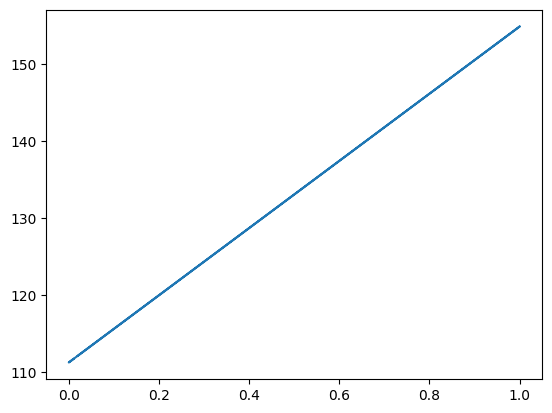

In [14]:
# theta_1 = 43.7053, theta_0 = 111.2103
# price = theta_1 * total_sqft + theta_0
p=43.7053*X_scaled_normalized_1d+111.2103
plt.plot(X_scaled_normalized_1d,p)
plt.show()

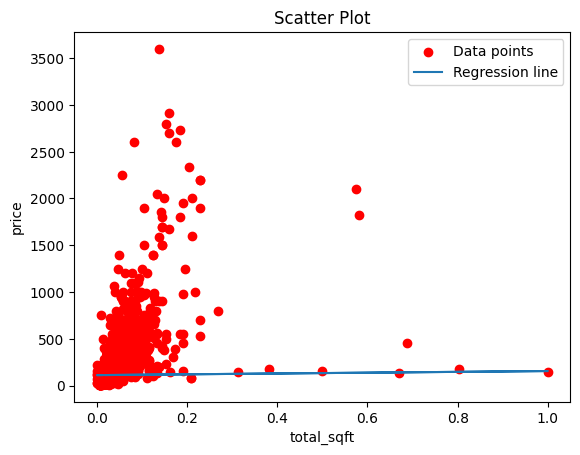

In [15]:
# Scatter plot

plt.scatter(X_scaled_normalized,Y,label='Data points',color="red")
plt.plot(X_scaled_normalized_1d,p,label="Regression line")
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.title('Scatter Plot')
plt.legend()
# plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

# using inbuilt library:

In [16]:
from sklearn.linear_model import SGDRegressor
# Create and train the model using SGD optimization
model=SGDRegressor(learning_rate='constant',eta0=0.001,max_iter=10000)
model.fit(X_scaled_normalized,Y)

SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=10000)

In [17]:
import matplotlib.pyplot as plt

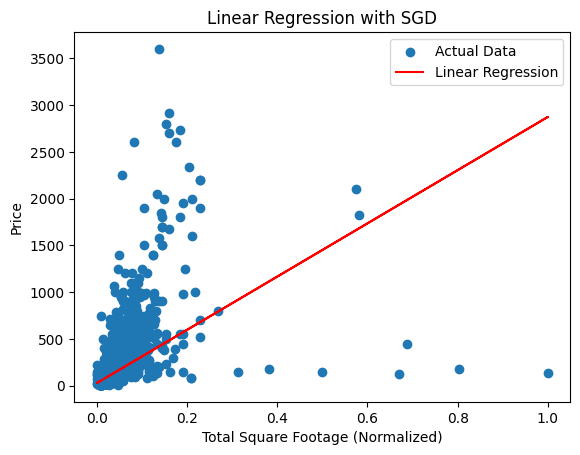

In [18]:
# Generate predictions using the trained model
y_pred=model.predict(X_scaled_normalized)

# Visualize the data and the linear regression line
plt.scatter(X_scaled_normalized,Y,label='Actual Data')
plt.plot(X_scaled_normalized, y_pred, color='red', label='Linear Regression')
plt.xlabel('Total Square Footage (Normalized)')
plt.ylabel('Price')
plt.title('Linear Regression with SGD')
plt.legend()
plt.show()


In [19]:
slope = model.coef_[0]
intercept = model.intercept_
print("Slope:", slope)
print("Intercept:", intercept)

Slope: 2844.735151527208
Intercept: [28.36675364]


In [24]:
def gredient_descent3(X,Y):

    theta_1 = 0
    theta_0 = 0
    
    l = 0.1

    #learning rate
    epochs = 1500

    #number of iterations
    n=float(len(X))

    # printing gradient descent

    for i in range(epochs):
        Y_pred = theta_1 * X + theta_0 
        
        # Calculate the Mean Squared Error (MSE)
        
        mse=(1/n)*sum((Y-Y_pred)**2)

        D_theta_1 = (-2/n)*sum(X*(Y-Y_pred))
        D_theta_0 = (-2/n)*sum(Y-Y_pred)
        theta_1 = theta_1-l*D_theta_1
        theta_0 = theta_0-l*D_theta_0
        
        print("Epoch {}: theta_1 = {:.4f}, theta_0 = {:.4f}, MSE = {:.4f}".format(i+1,theta_1,theta_0,mse))

In [25]:
gredient_descent3(X_scaled_normalized_1d,Y)

Epoch 1: theta_1 = 1.0772, theta_0 = 22.4907, MSE = 34866.1247
Epoch 2: theta_1 = 2.0199, theta_0 = 40.4769, MSE = 30303.4718
Epoch 3: theta_1 = 2.8550, theta_0 = 54.8602, MSE = 27384.0794
Epoch 4: theta_1 = 3.6042, theta_0 = 66.3619, MSE = 25515.9060
Epoch 5: theta_1 = 4.2845, theta_0 = 75.5587, MSE = 24320.2137
Epoch 6: theta_1 = 4.9098, theta_0 = 82.9122, MSE = 23554.7180
Epoch 7: theta_1 = 5.4911, theta_0 = 88.7912, MSE = 23064.4258
Epoch 8: theta_1 = 6.0372, theta_0 = 93.4909, MSE = 22750.1857
Epoch 9: theta_1 = 6.5550, theta_0 = 97.2475, MSE = 22548.5689
Epoch 10: theta_1 = 7.0503, theta_0 = 100.2496, MSE = 22418.9991
Epoch 11: theta_1 = 7.5276, theta_0 = 102.6484, MSE = 22335.5190
Epoch 12: theta_1 = 7.9904, theta_0 = 104.5645, MSE = 22281.5233
Epoch 13: theta_1 = 8.4416, theta_0 = 106.0947, MSE = 22246.3894
Epoch 14: theta_1 = 8.8836, theta_0 = 107.3162, MSE = 22223.3218
Epoch 15: theta_1 = 9.3182, theta_0 = 108.2907, MSE = 22207.9734
Epoch 16: theta_1 = 9.7468, theta_0 = 109.0

Epoch 157: theta_1 = 66.5074, theta_0 = 110.5300, MSE = 21954.0127
Epoch 158: theta_1 = 66.9061, theta_0 = 110.5181, MSE = 21952.4214
Epoch 159: theta_1 = 67.3048, theta_0 = 110.5062, MSE = 21950.8305
Epoch 160: theta_1 = 67.7034, theta_0 = 110.4943, MSE = 21949.2399
Epoch 161: theta_1 = 68.1020, theta_0 = 110.4824, MSE = 21947.6497
Epoch 162: theta_1 = 68.5005, theta_0 = 110.4705, MSE = 21946.0598
Epoch 163: theta_1 = 68.8989, theta_0 = 110.4586, MSE = 21944.4703
Epoch 164: theta_1 = 69.2974, theta_0 = 110.4468, MSE = 21942.8812
Epoch 165: theta_1 = 69.6958, theta_0 = 110.4349, MSE = 21941.2924
Epoch 166: theta_1 = 70.0941, theta_0 = 110.4230, MSE = 21939.7040
Epoch 167: theta_1 = 70.4924, theta_0 = 110.4111, MSE = 21938.1159
Epoch 168: theta_1 = 70.8906, theta_0 = 110.3992, MSE = 21936.5282
Epoch 169: theta_1 = 71.2889, theta_0 = 110.3873, MSE = 21934.9408
Epoch 170: theta_1 = 71.6870, theta_0 = 110.3755, MSE = 21933.3538
Epoch 171: theta_1 = 72.0851, theta_0 = 110.3636, MSE = 21931.

Epoch 306: theta_1 = 125.4231, theta_0 = 108.7723, MSE = 21720.8035
Epoch 307: theta_1 = 125.8152, theta_0 = 108.7606, MSE = 21719.2646
Epoch 308: theta_1 = 126.2073, theta_0 = 108.7489, MSE = 21717.7259
Epoch 309: theta_1 = 126.5993, theta_0 = 108.7372, MSE = 21716.1876
Epoch 310: theta_1 = 126.9912, theta_0 = 108.7255, MSE = 21714.6497
Epoch 311: theta_1 = 127.3832, theta_0 = 108.7138, MSE = 21713.1121
Epoch 312: theta_1 = 127.7750, theta_0 = 108.7021, MSE = 21711.5748
Epoch 313: theta_1 = 128.1669, theta_0 = 108.6904, MSE = 21710.0379
Epoch 314: theta_1 = 128.5586, theta_0 = 108.6787, MSE = 21708.5014
Epoch 315: theta_1 = 128.9504, theta_0 = 108.6670, MSE = 21706.9651
Epoch 316: theta_1 = 129.3421, theta_0 = 108.6553, MSE = 21705.4293
Epoch 317: theta_1 = 129.7337, theta_0 = 108.6436, MSE = 21703.8937
Epoch 318: theta_1 = 130.1253, theta_0 = 108.6320, MSE = 21702.3586
Epoch 319: theta_1 = 130.5169, theta_0 = 108.6203, MSE = 21700.8237
Epoch 320: theta_1 = 130.9084, theta_0 = 108.608

Epoch 452: theta_1 = 182.2054, theta_0 = 107.0782, MSE = 21499.7274
Epoch 453: theta_1 = 182.5911, theta_0 = 107.0667, MSE = 21498.2381
Epoch 454: theta_1 = 182.9768, theta_0 = 107.0551, MSE = 21496.7490
Epoch 455: theta_1 = 183.3624, theta_0 = 107.0436, MSE = 21495.2603
Epoch 456: theta_1 = 183.7480, theta_0 = 107.0321, MSE = 21493.7719
Epoch 457: theta_1 = 184.1336, theta_0 = 107.0206, MSE = 21492.2838
Epoch 458: theta_1 = 184.5191, theta_0 = 107.0091, MSE = 21490.7961
Epoch 459: theta_1 = 184.9046, theta_0 = 106.9976, MSE = 21489.3087
Epoch 460: theta_1 = 185.2900, theta_0 = 106.9861, MSE = 21487.8217
Epoch 461: theta_1 = 185.6754, theta_0 = 106.9746, MSE = 21486.3349
Epoch 462: theta_1 = 186.0607, theta_0 = 106.9631, MSE = 21484.8485
Epoch 463: theta_1 = 186.4460, theta_0 = 106.9516, MSE = 21483.3625
Epoch 464: theta_1 = 186.8312, theta_0 = 106.9401, MSE = 21481.8768
Epoch 465: theta_1 = 187.2164, theta_0 = 106.9287, MSE = 21480.3914
Epoch 466: theta_1 = 187.6016, theta_0 = 106.917

Epoch 603: theta_1 = 239.9623, theta_0 = 105.3550, MSE = 21278.5707
Epoch 604: theta_1 = 240.3415, theta_0 = 105.3437, MSE = 21277.1309
Epoch 605: theta_1 = 240.7207, theta_0 = 105.3324, MSE = 21275.6915
Epoch 606: theta_1 = 241.0999, theta_0 = 105.3210, MSE = 21274.2523
Epoch 607: theta_1 = 241.4790, theta_0 = 105.3097, MSE = 21272.8135
Epoch 608: theta_1 = 241.8581, theta_0 = 105.2984, MSE = 21271.3750
Epoch 609: theta_1 = 242.2371, theta_0 = 105.2871, MSE = 21269.9368
Epoch 610: theta_1 = 242.6161, theta_0 = 105.2758, MSE = 21268.4990
Epoch 611: theta_1 = 242.9950, theta_0 = 105.2645, MSE = 21267.0615
Epoch 612: theta_1 = 243.3739, theta_0 = 105.2532, MSE = 21265.6243
Epoch 613: theta_1 = 243.7528, theta_0 = 105.2419, MSE = 21264.1874
Epoch 614: theta_1 = 244.1316, theta_0 = 105.2306, MSE = 21262.7508
Epoch 615: theta_1 = 244.5104, theta_0 = 105.2193, MSE = 21261.3146
Epoch 616: theta_1 = 244.8891, theta_0 = 105.2080, MSE = 21259.8786
Epoch 617: theta_1 = 245.2678, theta_0 = 105.196

Epoch 763: theta_1 = 300.1036, theta_0 = 103.5607, MSE = 21052.2644
Epoch 764: theta_1 = 300.4761, theta_0 = 103.5496, MSE = 21050.8753
Epoch 765: theta_1 = 300.8485, theta_0 = 103.5385, MSE = 21049.4866
Epoch 766: theta_1 = 301.2209, theta_0 = 103.5273, MSE = 21048.0982
Epoch 767: theta_1 = 301.5933, theta_0 = 103.5162, MSE = 21046.7101
Epoch 768: theta_1 = 301.9657, theta_0 = 103.5051, MSE = 21045.3223
Epoch 769: theta_1 = 302.3379, theta_0 = 103.4940, MSE = 21043.9349
Epoch 770: theta_1 = 302.7102, theta_0 = 103.4829, MSE = 21042.5477
Epoch 771: theta_1 = 303.0824, theta_0 = 103.4718, MSE = 21041.1609
Epoch 772: theta_1 = 303.4546, theta_0 = 103.4607, MSE = 21039.7743
Epoch 773: theta_1 = 303.8267, theta_0 = 103.4496, MSE = 21038.3881
Epoch 774: theta_1 = 304.1988, theta_0 = 103.4385, MSE = 21037.0022
Epoch 775: theta_1 = 304.5708, theta_0 = 103.4274, MSE = 21035.6166
Epoch 776: theta_1 = 304.9428, theta_0 = 103.4163, MSE = 21034.2313
Epoch 777: theta_1 = 305.3148, theta_0 = 103.405

Epoch 889: theta_1 = 346.7110, theta_0 = 102.1701, MSE = 20879.6777
Epoch 890: theta_1 = 347.0783, theta_0 = 102.1592, MSE = 20878.3274
Epoch 891: theta_1 = 347.4455, theta_0 = 102.1482, MSE = 20876.9774
Epoch 892: theta_1 = 347.8127, theta_0 = 102.1373, MSE = 20875.6277
Epoch 893: theta_1 = 348.1799, theta_0 = 102.1263, MSE = 20874.2783
Epoch 894: theta_1 = 348.5470, theta_0 = 102.1154, MSE = 20872.9292
Epoch 895: theta_1 = 348.9141, theta_0 = 102.1044, MSE = 20871.5804
Epoch 896: theta_1 = 349.2811, theta_0 = 102.0935, MSE = 20870.2319
Epoch 897: theta_1 = 349.6481, theta_0 = 102.0825, MSE = 20868.8837
Epoch 898: theta_1 = 350.0150, theta_0 = 102.0716, MSE = 20867.5358
Epoch 899: theta_1 = 350.3819, theta_0 = 102.0606, MSE = 20866.1882
Epoch 900: theta_1 = 350.7488, theta_0 = 102.0497, MSE = 20864.8409
Epoch 901: theta_1 = 351.1156, theta_0 = 102.0387, MSE = 20863.4939
Epoch 902: theta_1 = 351.4824, theta_0 = 102.0278, MSE = 20862.1472
Epoch 903: theta_1 = 351.8491, theta_0 = 102.016

Epoch 1015: theta_1 = 392.6645, theta_0 = 100.7991, MSE = 20711.9008
Epoch 1016: theta_1 = 393.0266, theta_0 = 100.7883, MSE = 20710.5882
Epoch 1017: theta_1 = 393.3887, theta_0 = 100.7775, MSE = 20709.2758
Epoch 1018: theta_1 = 393.7507, theta_0 = 100.7667, MSE = 20707.9637
Epoch 1019: theta_1 = 394.1127, theta_0 = 100.7559, MSE = 20706.6519
Epoch 1020: theta_1 = 394.4747, theta_0 = 100.7451, MSE = 20705.3404
Epoch 1021: theta_1 = 394.8366, theta_0 = 100.7343, MSE = 20704.0291
Epoch 1022: theta_1 = 395.1985, theta_0 = 100.7235, MSE = 20702.7182
Epoch 1023: theta_1 = 395.5603, theta_0 = 100.7127, MSE = 20701.4076
Epoch 1024: theta_1 = 395.9221, theta_0 = 100.7019, MSE = 20700.0973
Epoch 1025: theta_1 = 396.2838, theta_0 = 100.6911, MSE = 20698.7872
Epoch 1026: theta_1 = 396.6455, theta_0 = 100.6804, MSE = 20697.4775
Epoch 1027: theta_1 = 397.0072, theta_0 = 100.6696, MSE = 20696.1680
Epoch 1028: theta_1 = 397.3689, theta_0 = 100.6588, MSE = 20694.8589
Epoch 1029: theta_1 = 397.7304, th

Epoch 1138: theta_1 = 436.9017, theta_0 = 99.4793, MSE = 20552.6297
Epoch 1139: theta_1 = 437.2589, theta_0 = 99.4687, MSE = 20551.3527
Epoch 1140: theta_1 = 437.6160, theta_0 = 99.4580, MSE = 20550.0761
Epoch 1141: theta_1 = 437.9731, theta_0 = 99.4474, MSE = 20548.7997
Epoch 1142: theta_1 = 438.3301, theta_0 = 99.4367, MSE = 20547.5236
Epoch 1143: theta_1 = 438.6871, theta_0 = 99.4260, MSE = 20546.2478
Epoch 1144: theta_1 = 439.0440, theta_0 = 99.4154, MSE = 20544.9722
Epoch 1145: theta_1 = 439.4010, theta_0 = 99.4047, MSE = 20543.6970
Epoch 1146: theta_1 = 439.7578, theta_0 = 99.3941, MSE = 20542.4220
Epoch 1147: theta_1 = 440.1147, theta_0 = 99.3835, MSE = 20541.1474
Epoch 1148: theta_1 = 440.4715, theta_0 = 99.3728, MSE = 20539.8730
Epoch 1149: theta_1 = 440.8282, theta_0 = 99.3622, MSE = 20538.5989
Epoch 1150: theta_1 = 441.1849, theta_0 = 99.3515, MSE = 20537.3251
Epoch 1151: theta_1 = 441.5416, theta_0 = 99.3409, MSE = 20536.0515
Epoch 1152: theta_1 = 441.8983, theta_0 = 99.330

Epoch 1289: theta_1 = 490.3813, theta_0 = 97.8838, MSE = 20363.0162
Epoch 1290: theta_1 = 490.7325, theta_0 = 97.8733, MSE = 20361.7818
Epoch 1291: theta_1 = 491.0836, theta_0 = 97.8628, MSE = 20360.5477
Epoch 1292: theta_1 = 491.4347, theta_0 = 97.8523, MSE = 20359.3138
Epoch 1293: theta_1 = 491.7857, theta_0 = 97.8419, MSE = 20358.0802
Epoch 1294: theta_1 = 492.1367, theta_0 = 97.8314, MSE = 20356.8469
Epoch 1295: theta_1 = 492.4877, theta_0 = 97.8209, MSE = 20355.6138
Epoch 1296: theta_1 = 492.8386, theta_0 = 97.8104, MSE = 20354.3810
Epoch 1297: theta_1 = 493.1895, theta_0 = 97.8000, MSE = 20353.1485
Epoch 1298: theta_1 = 493.5403, theta_0 = 97.7895, MSE = 20351.9163
Epoch 1299: theta_1 = 493.8911, theta_0 = 97.7790, MSE = 20350.6844
Epoch 1300: theta_1 = 494.2419, theta_0 = 97.7686, MSE = 20349.4527
Epoch 1301: theta_1 = 494.5926, theta_0 = 97.7581, MSE = 20348.2213
Epoch 1302: theta_1 = 494.9433, theta_0 = 97.7476, MSE = 20346.9902
Epoch 1303: theta_1 = 495.2939, theta_0 = 97.737

Epoch 1413: theta_1 = 533.6261, theta_0 = 96.5936, MSE = 20212.0389
Epoch 1414: theta_1 = 533.9724, theta_0 = 96.5832, MSE = 20210.8384
Epoch 1415: theta_1 = 534.3186, theta_0 = 96.5729, MSE = 20209.6381
Epoch 1416: theta_1 = 534.6649, theta_0 = 96.5626, MSE = 20208.4380
Epoch 1417: theta_1 = 535.0111, theta_0 = 96.5522, MSE = 20207.2383
Epoch 1418: theta_1 = 535.3572, theta_0 = 96.5419, MSE = 20206.0388
Epoch 1419: theta_1 = 535.7033, theta_0 = 96.5316, MSE = 20204.8395
Epoch 1420: theta_1 = 536.0494, theta_0 = 96.5213, MSE = 20203.6406
Epoch 1421: theta_1 = 536.3954, theta_0 = 96.5109, MSE = 20202.4419
Epoch 1422: theta_1 = 536.7414, theta_0 = 96.5006, MSE = 20201.2435
Epoch 1423: theta_1 = 537.0874, theta_0 = 96.4903, MSE = 20200.0453
Epoch 1424: theta_1 = 537.4333, theta_0 = 96.4800, MSE = 20198.8475
Epoch 1425: theta_1 = 537.7792, theta_0 = 96.4696, MSE = 20197.6499
Epoch 1426: theta_1 = 538.1251, theta_0 = 96.4593, MSE = 20196.4525
Epoch 1427: theta_1 = 538.4709, theta_0 = 96.449

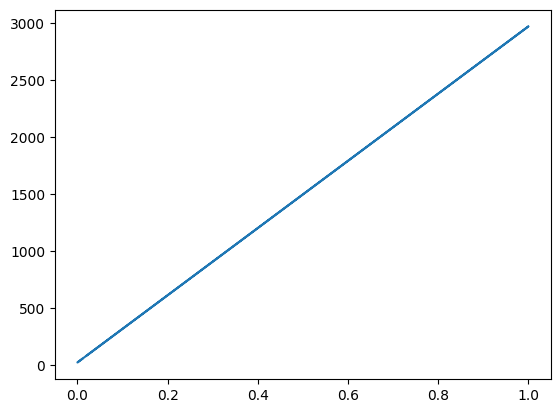

In [26]:
# Epoch 15000: theta_1 = 2948.7297, theta_0 = 24.5391, MSE = 15113.4586
t = 2948.7297*X_scaled_normalized + 24.5391
plt.plot(X_scaled_normalized,t)

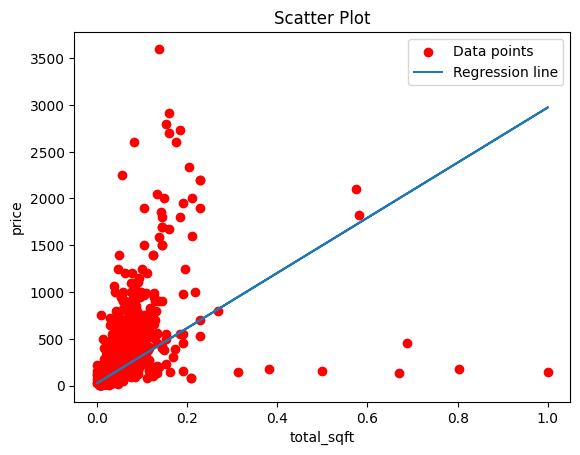

In [27]:
# Scatter plot
plt.scatter(X_scaled_normalized, Y, label='Data points',color="red")
plt.plot(X_scaled_normalized_1d,t,label="Regression line")
plt.xlabel('total_sqft')
plt.ylabel('price')
plt.title('Scatter Plot')
plt.legend()
# plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

Splitting data into the training and testing, 60:40, 70:30, ND 80:20.

In [30]:
from sklearn.model_selection import train_test_split
# Split data into 60% training, 40% testing
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X_scaled_normalized, Y, test_size=0.4,  random_state=None)
# Split data into 70% training, 30% testing
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_scaled_normalized, Y, test_size=0.3,  random_state=None)
# Split data into 80% training, 20% testing
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_scaled_normalized, Y, test_size=0.2,  random_state=None)

In [31]:
X_train_60.shape

(7964, 1)

In [32]:
X_train_70.shape

(9291, 1)

In [33]:
X_train_80.shape

(10619, 1)

Train linear regression model and test USING Gradient Descent and using the library. Find out the limitation in both cases.

# Using Linear Regression model

Mean Absolute Error: 51.467105316243455
Mean Squared Error: 15252.050858558554
Root Mean Squared Error: 123.49919375671467
R-squared: 0.34947039924468104


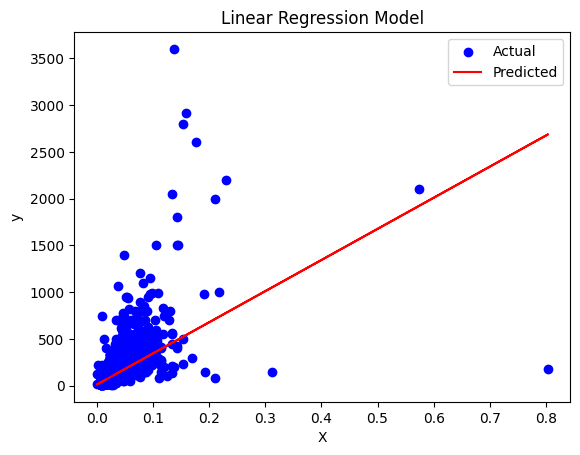

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Initialize and train the linear regression model

model_60 = LinearRegression()
model_60.fit(X_train_60, y_train_60)

# Make predictions on the test set
y_pred_60 = model_60.predict(X_test_60)

# Calculate evaluation metrics
mae_60 = mean_absolute_error(y_test_60, y_pred_60)
mse_60 = mean_squared_error(y_test_60, y_pred_60)
rmse_60 = np.sqrt(mse_60)
r2_60 = r2_score(y_test_60, y_pred_60)

# Print the evaluation metrics
print("Mean Absolute Error:", mae_60)
print("Mean Squared Error:", mse_60)
print("Root Mean Squared Error:", rmse_60)
print("R-squared:", r2_60)

# Plot the predictions against the actual values
plt.scatter(X_test_60, y_test_60, color='blue', label='Actual')
plt.plot(X_test_60, y_pred_60, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

Mean Absolute Error: 50.68521840380844
Mean Squared Error: 15541.986351134234
Root Mean Squared Error: 124.66750318801702
R-squared: 0.30279323968760374


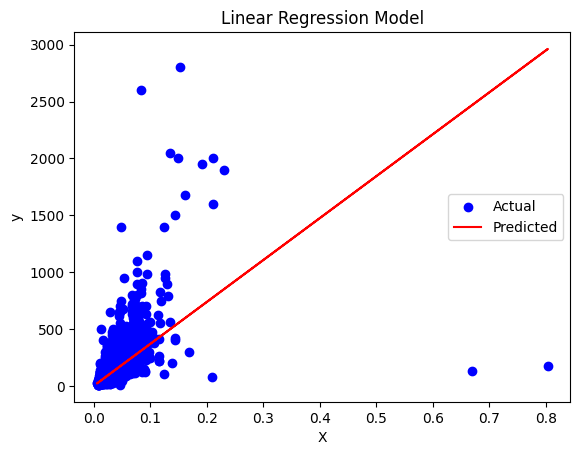

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Initialize and train the linear regression model
model_70 = LinearRegression()
model_70.fit(X_train_70, y_train_70)
# Make predictions on the test set
y_pred_70 = model_70.predict(X_test_70)
# Calculate evaluation metrics
mae_70 = mean_absolute_error(y_test_70, y_pred_70)
mse_70 = mean_squared_error(y_test_70, y_pred_70)
rmse_70 = np.sqrt(mse_70)
r2_70 = r2_score(y_test_70, y_pred_70)
# Print the evaluation metrics
print("Mean Absolute Error:", mae_70)
print("Mean Squared Error:", mse_70)
print("Root Mean Squared Error:", rmse_70)
print("R-squared:", r2_70)
# Plot the predictions against the actual values
plt.scatter(X_test_70, y_test_70, color='blue', label='Actual')
plt.plot(X_test_70, y_pred_70, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

Mean Absolute Error: 50.137182206762226
Mean Squared Error: 11917.086766661285
Root Mean Squared Error: 109.16541011997016
R-squared: 0.42873336536587836


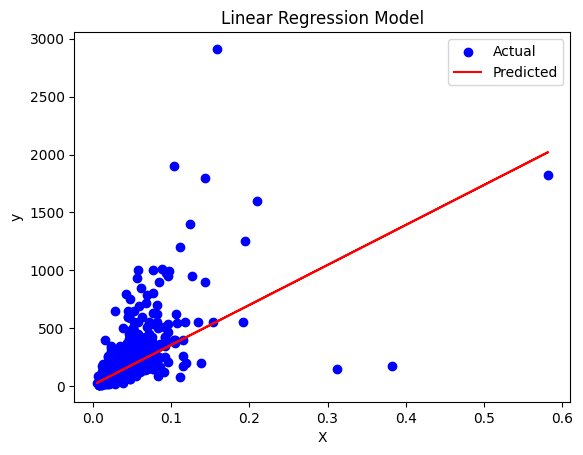

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Initialize and train the linear regression model
model_80 = LinearRegression()
model_80.fit(X_train_80, y_train_80)
# Make predictions on the test set
y_pred_80 = model_80.predict(X_test_80)
# Calculate evaluation metrics
mae_80 = mean_absolute_error(y_test_80, y_pred_80)
mse_80 = mean_squared_error(y_test_80, y_pred_80)
rmse_80 = np.sqrt(mse_80)
r2_80 = r2_score(y_test_80, y_pred_80)
# Print the evaluation metrics
print("Mean Absolute Error:", mae_80)
print("Mean Squared Error:", mse_80)
print("Root Mean Squared Error:", rmse_80)
print("R-squared:", r2_80)
# Plot the predictions against the actual values
plt.scatter(X_test_80, y_test_80, color='blue', label='Actual')
plt.plot(X_test_80, y_pred_80, color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()

For the 60-40 split: MAE: 52.901 MSE: 15265.318 RMSE: 123.553 R-squared: 0.379

For the 70-30 split: MAE: 53.000 MSE: 17134.404 RMSE: 130.898 R-squared: 0.383

For the 80-20 split: MAE: 52.913 MSE: 18267.969 RMSE: 135.159 R-squared: 0.398